# Capstone Project  - Ecommerce    
## Prepared and Submitted By: Saroj Kumar Bisi

**DESCRIPTION**

**Problem Statement**

 * Amazon is an online shopping website that now caters to millions of people everywhere. Over 34,000 consumer reviews for Amazon brand products like Kindle, Fire TV Stick and more are provided.
 
 * The dataset has attributes like brand, categories, primary categories, reviews.title, reviews.text, and the sentiment. Sentiment is a categorical variable with three levels "Positive", "Negative“, and "Neutral". For a given unseen data, the sentiment needs to be predicted. 
 
 * You are required to predict Sentiment or Satisfaction of a purchase based on multiple features and review text.

**Data Snapshot**

 

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,f1_score,accuracy_score
from sklearn.metrics import accuracy_score,precision_score,recall_score

from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier,XGBRFClassifier

import tensorflow as tf

import nltk
import gensim

import warnings
warnings.filterwarnings('ignore')

## Project Task: Week 1

**Class Imbalance Problem:**

1. Perform an EDA on the dataset
         
    a. See what a positive, negative, and neutral review looks like.
    
    b. Check the class count for each class. It’s a class imbalance problem.
    
2. Convert the reviews into Tf-Idf Document Term Matrix 

3. Run multinomial Naive Bayes classifier. Everything will be classified as positive because of the class imbalance.


### Code :

In [104]:
#Load  Data
train=pd.read_csv('train_data.csv')
test_hidden=pd.read_csv('test_data_hidden.csv')
test=pd.read_csv('test_data.csv')

In [105]:
print('the shape of train data: ', train.shape)
print('the shape of test data: ', test.shape)
print('the shape of test_hidden data: ', test_hidden.shape)

the shape of train data:  (4000, 8)
the shape of test data:  (1000, 7)
the shape of test_hidden data:  (1000, 8)


In [106]:
train.head(1)

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive


In [107]:
test.head(1)

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device


In [39]:
test_hidden.head(1)

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device,Positive


In [40]:
# Since the train0 and train_hidden0 are having same features its good to merge them together and perform the EDA
#Data merge
dataSet=pd.concat([train,test_hidden])
print('shape of merged data is: ',dataSet.shape)
dataSet.head()

shape of merged data is:  (5000, 8)


,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [41]:
#Lets take only relevent columns for the analysis(reviews.text and sentiment)
dataSet=dataSet[['reviews.text','sentiment']]
dataSet.head(5)

,reviews.text,sentiment
0,Purchased on Black FridayPros - Great Price (e...,Positive
1,I purchased two Amazon in Echo Plus and two do...,Positive
2,Just an average Alexa option. Does show a few ...,Neutral
3,"very good product. Exactly what I wanted, and ...",Positive
4,This is the 3rd one I've purchased. I've bough...,Positive


In [42]:
dataSet.info() # There is no null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   reviews.text  5000 non-null   object
 1   sentiment     5000 non-null   object
dtypes: object(2)
memory usage: 117.2+ KB


In [43]:
dataSet.sentiment.value_counts()

Positive    4686
Neutral      197
Negative     117
Name: sentiment, dtype: int64

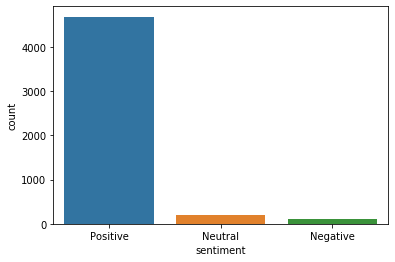

In [44]:
#Check for data imbalance
sns.countplot(x='sentiment',data=dataSet)

In [45]:
# As we can see from above figure It’s a class imbalance problem.

In [46]:
# Text preprocessing function
def text_preprocessing(df):

    #step1.Converting to list for easy manipulation
    reviews_list=df['reviews.text'].values
    print('Text Preprocessing Step-1:Converting to list for easy manipulation \n',reviews_list[0],'\n')

    #step2.standardize the case into lowercase
    reviews_list=[doc.lower() for doc in reviews_list]

    #step3.Tokenize
    from nltk.tokenize import word_tokenize
    tokenized_reviews=[word_tokenize(doc) for doc in reviews_list]

    print('Text Preprocessing Step-2&3:Word standardize and Tokenize \n',tokenized_reviews[0],'\n')

    ###step4.Import stop words and punctuations
    from nltk.corpus import stopwords
    from string import punctuation
    nltk_stop=stopwords.words('english')
    punct=list(punctuation)

    stop_punct=nltk_stop+punct #combine stop waords and punctuations

    #print('Text Preprocessing Step-4:stop words and punctuations list \n',stop_punct,'\n')


    ###step5.Remove stop words and punctuations from the tokenized_reviews
    def del_stop(sent):
        return [term for term in sent if term not in stop_punct]

    reviews_nonstop = [del_stop(doc) for doc in tokenized_reviews]
    print('Text Preprocessing Step-5:Remove stop words and punctuations \n',reviews_nonstop[0],'\n')


    #Stemming OR Lemmatize depending on the need
    #Stemming
    #from nltk.stem import PorterStemmer
    #stemmer = PorterStemmer()

    #stemmed_docs=[]
    #for terms in reviews_nonstop:
        #stemmed_docs.append([stemmer.stem(word) for word in terms])

    #print(stemmed_docs[0])

    #step.6.Lemmatize
    from nltk.stem import WordNetLemmatizer
    lemmatizer=WordNetLemmatizer()

    lemmatized_docs=[]
    for terms in reviews_nonstop:
        lemmatized_docs.append([lemmatizer.lemmatize(word) for word in terms])

    print('Text Preprocessing Step-6:lemmatized_docs \n',lemmatized_docs[0],'\n')

    ##step7.Delete numeric tokens. 
    import re
    def del_numeric(doc):
        clean_docs=[]
        for each_token in doc:
            if re.search('[a-zA-Z]', each_token):
                 clean_docs.append(each_token)
        return clean_docs 

    reviews_clean = [del_numeric(sent) for sent in lemmatized_docs]

    print('Text Preprocessing Step-7:Delete numeric tokens \n',reviews_clean[0],'\n')

    ###step8.Creating back the Clean documents
    clean_docs = [" ".join(sent) for sent in reviews_clean]

    print('Text Preprocessing Step-8:Clean  documents \n',clean_docs[0],'\n')
    return clean_docs

#### Text Preprocessing for Train Data , Test Data and  on Train+Test Data

In [47]:
#Lets take only relevent columns for the preprocessing of Train Data(reviews.text and sentiment)
traindata=train[['reviews.text','sentiment']]

train_clean_reviews=text_preprocessing(traindata)

#Lets take only relevent columns for the preprocessing of Test Data (reviews.text and sentiment)
testdata=test_hidden[['reviews.text','sentiment']]

test_clean_reviews=text_preprocessing(testdata)

#Lets take only relevent columns for the preprocessing of Full Dataset (reviews.text and sentiment)
fulldata=dataSet[['reviews.text','sentiment']]

fulldata_clean_reviews=text_preprocessing(fulldata)



Text Preprocessing Step-1:Converting to list for easy manipulation 
 Purchased on Black FridayPros - Great Price (even off sale)Very powerful and fast with quad core processors Amazing soundWell builtCons -Amazon ads, Amazon need this to subsidize the tablet and will remove the adds if you pay them $15.Inability to access other apps except the ones from Amazon. There is a way which I was able to accomplish to add the Google Play storeNet this is a great tablet for the money 

Text Preprocessing Step-2&3:Word standardize and Tokenize 
 ['purchased', 'on', 'black', 'fridaypros', '-', 'great', 'price', '(', 'even', 'off', 'sale', ')', 'very', 'powerful', 'and', 'fast', 'with', 'quad', 'core', 'processors', 'amazing', 'soundwell', 'builtcons', '-amazon', 'ads', ',', 'amazon', 'need', 'this', 'to', 'subsidize', 'the', 'tablet', 'and', 'will', 'remove', 'the', 'adds', 'if', 'you', 'pay', 'them', '$', '15.inability', 'to', 'access', 'other', 'apps', 'except', 'the', 'ones', 'from', 'amazon', 

#### Text Preprocessing for Test Data

In [48]:
#Lets take only relevent columns for the preprocessing (reviews.text and sentiment)
testdata=test_hidden[['reviews.text','sentiment']]

test_clean_reviews=text_preprocessing(testdata)


Text Preprocessing Step-1:Converting to list for easy manipulation 
 Amazon kindle fire has a lot of free app and can be used by any one that wants to get online anywhere 

Text Preprocessing Step-2&3:Word standardize and Tokenize 
 ['amazon', 'kindle', 'fire', 'has', 'a', 'lot', 'of', 'free', 'app', 'and', 'can', 'be', 'used', 'by', 'any', 'one', 'that', 'wants', 'to', 'get', 'online', 'anywhere'] 

Text Preprocessing Step-5:Remove stop words and punctuations 
 ['amazon', 'kindle', 'fire', 'lot', 'free', 'app', 'used', 'one', 'wants', 'get', 'online', 'anywhere'] 

Text Preprocessing Step-6:lemmatized_docs 
 ['amazon', 'kindle', 'fire', 'lot', 'free', 'app', 'used', 'one', 'want', 'get', 'online', 'anywhere'] 

Text Preprocessing Step-7:Delete numeric tokens 
 ['amazon', 'kindle', 'fire', 'lot', 'free', 'app', 'used', 'one', 'want', 'get', 'online', 'anywhere'] 

Text Preprocessing Step-8:Clean  documents 
 amazon kindle fire lot free app used one want get online anywhere 



#### Prepare for X_train,X_test,y_train and y_test 

In [49]:
X_train=train_clean_reviews
X_test=test_clean_reviews
y_train=train['sentiment']
y_test=test_hidden['sentiment']

print('the shape of X_train and  y_train: ', len(X_train), y_train.shape)
print('the shape of X_test and  y_test: ', len(X_test),y_test.shape)

the shape of X_train and  y_train:  4000 (4000,)
the shape of X_test and  y_test:  1000 (1000,)


#### Prepare Document term matrix using TfIdf

In [50]:
### Prepare Document term matrix using TfIdf
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 4500)

# Model fitting
X_train_ds =vectorizer.fit(X_train)
X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)

X_train_bow.shape, X_test_bow.shape

((4000, 4342), (1000, 4342))

In [51]:
# Convert the document vector matrix into dataframe (OPTIONAl Step..this is just to see the data)
features_name=X_train_ds.get_feature_names()
train_df=pd.DataFrame(X_train_bow.todense(),columns=features_name)
train_df.head()

,00,10,10th,10x,11yr,128gb,13th,14,15,16g,...,äôve,äù,äúalexa,äúbest,äúdropping,äúdual,äúshow,äúskills,äústar,äúthings
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.219932,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Model building and testing using multinomial Naive Bayes classifier

In [52]:
#Model building using multinomial Naive Bayes classifier
model_MNB = MultinomialNB()
model_MNB.fit( X_train_bow.toarray(),y_train)

#Get Train and Test Accuracy Score
train_score=model_MNB.score(X_train_bow.toarray(),y_train)
test_score=model_MNB.score(X_test_bow.toarray(),y_test)
print('train score is:{} and test score is: {}'.format(train_score,test_score))

#Get precision    recall  and f1-score
cr=classification_report(y_true=y_train,y_pred=model_MNB.predict( X_train_bow.toarray() ))
print('classification_report TRAIN Data\n',cr)

#Get precision    recall  and f1-score
cr=classification_report(y_true=y_test,y_pred=model_MNB.predict( X_test_bow.toarray() ))
print('classification_report TEST Data\n',cr)

train score is:0.93725 and test score is: 0.937
classification_report TRAIN Data
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        93
     Neutral       0.00      0.00      0.00       158
    Positive       0.94      1.00      0.97      3749

    accuracy                           0.94      4000
   macro avg       0.31      0.33      0.32      4000
weighted avg       0.88      0.94      0.91      4000

classification_report TEST Data
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        24
     Neutral       0.00      0.00      0.00        39
    Positive       0.94      1.00      0.97       937

    accuracy                           0.94      1000
   macro avg       0.31      0.33      0.32      1000
weighted avg       0.88      0.94      0.91      1000



In [53]:
# Prediction
test_ds_predicted = model_MNB.predict( X_test_bow.toarray() )
test_ds_predicted[0:50]

# as seen belw :Everything is  predicted as positive because of the class imbalance

array(['Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive'],
      dtype='<U8')

#### Observation - 1

> Everything is  predicted as positive because of the class imbalance.


## Project Task: Week 2

**Tackling Class Imbalance Problem:**
    
1. Oversampling or undersampling can be used to tackle the class imbalance problem. 

2. In case of class imbalance criteria, use the following metrices for evaluating model performance: precision, recall, F1-score, AUC-ROC curve. Use F1-Score as the evaluation criteria for this project.

3. Use Tree-based classifiers like Random Forest and XGBoost.

**Note**: Tree-based classifiers work on two ideologies namely, Bagging or Boosting and have fine-tuning parameter which takes care of the imbalanced class


### Code :

#### Code for over sampling approach

length of X_train_bow and y_train before Oversampling 4000 4000
length of X_test_bow and y_test before Oversampling 1000 1000
length of X_train_bow and y_train after Oversampling 11247 11247
length of X_test_bow and y_test after Oversampling 2811 2811


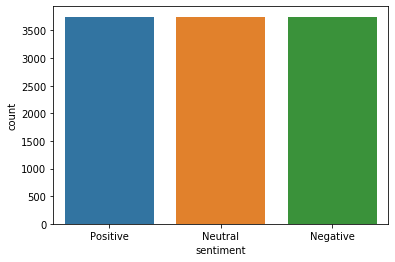

In [54]:
from imblearn.over_sampling import SMOTE
print('length of X_train_bow and y_train before Oversampling',X_train_bow.shape[0],len(y_train))
print('length of X_test_bow and y_test before Oversampling',X_test_bow.shape[0],len(y_test))

OS=SMOTE(random_state=42)
X_train_bow_OS,y_train_OS=OS.fit_resample(X_train_bow,y_train)
X_test_bow_OS,y_test_OS=OS.fit_resample(X_test_bow,y_test)

print('length of X_train_bow and y_train after Oversampling',X_train_bow_OS.shape[0],len(y_train_OS))

print('length of X_test_bow and y_test after Oversampling',X_test_bow_OS.shape[0],len(y_test_OS))

#Check for data balance
sns.countplot(x=y_train_OS)

#### Code for under sampling approach

length of X_train_bow and y_train before Undersampling 4000 4000
length of X_test_bow and y_test before Undersampling 1000 1000
length of X_train_bow and y_train after Undersampling 279 279
length of X_test_bow and y_test after Undersampling 72 72


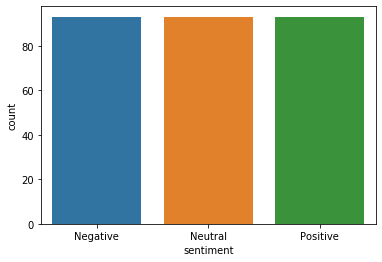

In [55]:
from imblearn.under_sampling import RandomUnderSampler,NearMiss
print('length of X_train_bow and y_train before Undersampling',X_train_bow.shape[0],len(y_train))
print('length of X_test_bow and y_test before Undersampling',X_test_bow.shape[0],len(y_test))

US=NearMiss()
X_train_bow_US,y_train_US=US.fit_resample(X_train_bow,y_train)
X_test_bow_US,y_test_US=US.fit_resample(X_test_bow,y_test)

print('length of X_train_bow and y_train after Undersampling',X_train_bow_US.shape[0],len(y_train_US))
print('length of X_test_bow and y_test after Undersampling',X_test_bow_US.shape[0],len(y_test_US))

#Check for data balance
sns.countplot(x=y_train_US)

#### Approach-1: Use of multinomial Naive Bayes classifier with Oversampling data

In [56]:
%%time
#Model building using multinomial Naive Bayes classifier
model_MNB_OS = MultinomialNB()
model_MNB_OS.fit( X_train_bow_OS.toarray(),y_train_OS)

#Get Train and Test Accuracy Score
train_score=model_MNB_OS.score(X_train_bow_OS.toarray(),y_train_OS)
test_score=model_MNB_OS.score(X_test_bow_OS.toarray(),y_test_OS)
print('train score is:{} '.format(train_score))
print('test score is:{} '.format(test_score))

#Get precision    recall  and f1-score on Train data
cr=classification_report(y_true=y_train_OS,y_pred=model_MNB_OS.predict( X_train_bow_OS.toarray() ))
print('classification_report TRAIN Data\n',cr)

#Get precision    recall  and f1-score on Test data
cr=classification_report(y_true=y_test_OS,y_pred=model_MNB_OS.predict( X_test_bow_OS.toarray() ))
print('classification_report TEST Data\n',cr)

train score is:0.9718147061438606 
test score is:0.6125933831376734 
classification_report TRAIN Data
               precision    recall  f1-score   support

    Negative       0.98      1.00      0.99      3749
     Neutral       0.95      1.00      0.97      3749
    Positive       1.00      0.92      0.96      3749

    accuracy                           0.97     11247
   macro avg       0.97      0.97      0.97     11247
weighted avg       0.97      0.97      0.97     11247

classification_report TEST Data
               precision    recall  f1-score   support

    Negative       0.87      0.53      0.66       937
     Neutral       0.61      0.43      0.51       937
    Positive       0.52      0.88      0.65       937

    accuracy                           0.61      2811
   macro avg       0.67      0.61      0.61      2811
weighted avg       0.67      0.61      0.61      2811

Wall time: 929 ms


In [57]:
# Prediction
test_ds_predicted = model_MNB_OS.predict( X_test_bow_OS.toarray() )
test_ds_predicted[0:50]

array(['Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Neutral', 'Positive', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Neutral',
       'Positive', 'Positive', 'Positive', 'Negative', 'Positive'],
      dtype='<U8')

#### Prepare  roc and auc score

roc_auc_score: 0.8979081265967248
roc_auc_score: 0.7256622955935802
roc_auc_score: 0.8987834422399881


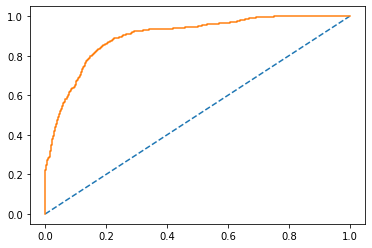

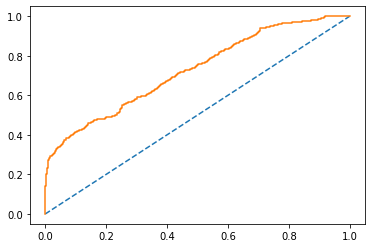

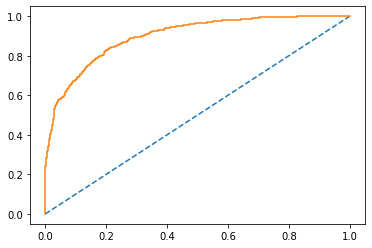

In [59]:
#Since this is a multi-class classificationm we need to ensure our labels follow binary classification logic
#To achieve this target we can use OneVsRestClassifier
#Requirement of OneVsRestClassifier is:
# 1. labels must be numeric in nature
# 2. model algo must support either predict_proba and decision_function


#Lets first encode our labels
from sklearn.preprocessing import label_binarize

y_train_lb = label_binarize(y_train_OS, classes=['Negative','Neutral','Positive'])
y_test_lb = label_binarize(y_test_OS, classes=['Negative','Neutral','Positive'])

n_classes = y_train_lb.shape[1]

#Create NaiveBayes OneVsRestClassifier Model
from sklearn.multiclass import OneVsRestClassifier

multiClassModel = OneVsRestClassifier(MultinomialNB())
y_score = multiClassModel.fit(X_train_bow_OS.toarray(),y_train_lb).predict_proba(X_test_bow_OS.toarray())

##############################################################################################################
#Plot ROC-AUC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

fpr=dict()
tpr=dict()
auc =dict()

for i in range(n_classes):
    fpr[i],tpr[i],_ = roc_curve(y_test_lb[:,i], y_score[:,i])
    auc[i] = roc_auc_score(y_test_lb[:,i], y_score[:,i])

for i in range(n_classes):
    plt.figure()
    print('roc_auc_score:',auc[i])
    plt.plot([0,1],[0,1], linestyle = '--')
    plt.plot(fpr[i],tpr[i])

#### Approach-2:Use of multinomial Naive Bayes classifier with  Undersampling Data

In [60]:
#Model building using multinomial Naive Bayes classifier
model_MNB = MultinomialNB()
model_MNB.fit( X_train_bow_US.toarray(),y_train_US)

#Get Train and Test Accuracy Score
train_score=model_MNB.score(X_train_bow_US.toarray(),y_train_US)
test_score=model_MNB.score(X_test_bow_US.toarray(),y_test_US)
print('train score is:{} '.format(train_score))
print('test score is:{} '.format(test_score))

#Get precision    recall  and f1-score on Train data
cr=classification_report(y_true=y_train_US,y_pred=model_MNB.predict( X_train_bow_US.toarray() ))
print('classification_report TRAIN Data\n',cr)

#Get precision    recall  and f1-score on Test data
cr=classification_report(y_true=y_test_US,y_pred=model_MNB.predict( X_test_bow_US.toarray() ))
print('classification_report TEST Data\n',cr)

train score is:0.9498207885304659 
test score is:0.7083333333333334 
classification_report TRAIN Data
               precision    recall  f1-score   support

    Negative       1.00      0.90      0.95        93
     Neutral       0.99      0.96      0.97        93
    Positive       0.88      0.99      0.93        93

    accuracy                           0.95       279
   macro avg       0.96      0.95      0.95       279
weighted avg       0.96      0.95      0.95       279

classification_report TEST Data
               precision    recall  f1-score   support

    Negative       0.69      0.75      0.72        24
     Neutral       0.68      0.62      0.65        24
    Positive       0.75      0.75      0.75        24

    accuracy                           0.71        72
   macro avg       0.71      0.71      0.71        72
weighted avg       0.71      0.71      0.71        72



#### Prepare  roc and auc score

roc_auc_score: 0.8585069444444444
roc_auc_score: 0.7109375
roc_auc_score: 0.7899305555555556


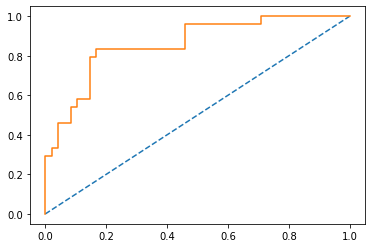

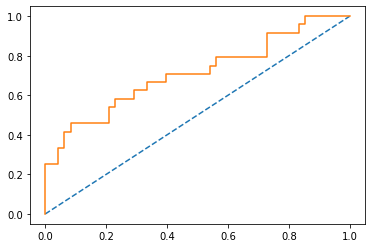

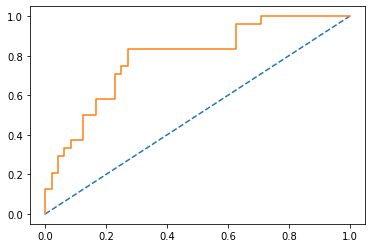

In [62]:
#Since this is a multi-class classificationm we need to ensure our labels follow binary classification logic
#To achieve this target we can use OneVsRestClassifier
#Requirement of OneVsRestClassifier is:
# 1. labels must be numeric in nature
# 2. model algo must support either predict_proba and decision_function


#Lets first encode our labels
from sklearn.preprocessing import label_binarize

y_train_lb = label_binarize(y_train_US, classes=['Negative','Neutral','Positive'])
y_test_lb = label_binarize(y_test_US, classes=['Negative','Neutral','Positive'])

n_classes = y_train_lb.shape[1]

#Create NaiveBayes OneVsRestClassifier Model
from sklearn.multiclass import OneVsRestClassifier

multiClassModel = OneVsRestClassifier(MultinomialNB())
y_score = multiClassModel.fit(X_train_bow_US.toarray(),y_train_lb).predict_proba(X_test_bow_US.toarray())

##############################################################################################################
#Plot ROC-AUC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

fpr=dict()
tpr=dict()
auc =dict()

for i in range(n_classes):
    fpr[i],tpr[i],_ = roc_curve(y_test_lb[:,i], y_score[:,i])
    auc[i] = roc_auc_score(y_test_lb[:,i], y_score[:,i])

for i in range(n_classes):
    plt.figure()
    print('roc_auc_score:',auc[i])
    plt.plot([0,1],[0,1], linestyle = '--')
    plt.plot(fpr[i],tpr[i])

#### Approach-3:Use of Logistic Regression  with Oversampling Data

In [63]:
%%time
#Model building using LogisticRegression
from sklearn.linear_model import LogisticRegression
model_LR_OS=LogisticRegression()

model_LR_OS.fit( X_train_bow_OS.toarray(),y_train_OS)

#Get Train and Test Accuracy Score
train_score=model_LR_OS.score(X_train_bow_OS.toarray(),y_train_OS)
test_score=model_LR_OS.score(X_test_bow_OS.toarray(),y_test_OS)
print('train score is:{} '.format(train_score))
print('test score is:{} '.format(test_score))

#Get precision    recall  and f1-score on Train data
cr=classification_report(y_true=y_train_OS,y_pred=model_LR_OS.predict( X_train_bow_OS.toarray() ))
print('classification_report TRAIN Data\n',cr)

#Get precision    recall  and f1-score on Test data
cr=classification_report(y_true=y_test_OS,y_pred=model_LR_OS.predict( X_test_bow_OS.toarray() ))
print('classification_report TEST Data\n',cr)

train score is:0.9936872054770161 
test score is:0.6318036286019211 
classification_report TRAIN Data
               precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      3749
     Neutral       0.99      1.00      0.99      3749
    Positive       1.00      0.98      0.99      3749

    accuracy                           0.99     11247
   macro avg       0.99      0.99      0.99     11247
weighted avg       0.99      0.99      0.99     11247

classification_report TEST Data
               precision    recall  f1-score   support

    Negative       0.93      0.52      0.67       937
     Neutral       0.73      0.41      0.53       937
    Positive       0.51      0.96      0.67       937

    accuracy                           0.63      2811
   macro avg       0.72      0.63      0.62      2811
weighted avg       0.72      0.63      0.62      2811

Wall time: 5.39 s


#### Prepare  roc and auc score

roc_auc_score: 0.9200535554216607
roc_auc_score: 0.758722688386492
roc_auc_score: 0.9138534504065633


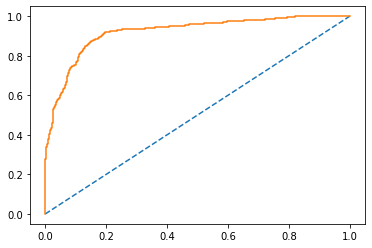

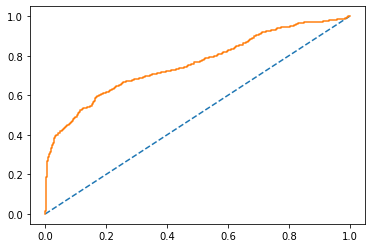

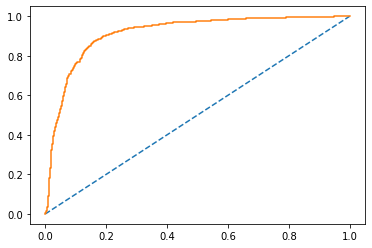

In [33]:
%%time
#Since this is a multi-class classificationm we need to ensure our labels follow binary classification logic
#To achieve this target we can use OneVsRestClassifier
#Requirement of OneVsRestClassifier is:
# 1. labels must be numeric in nature
# 2. model algo must support either predict_proba and decision_function


#Lets first encode our labels
from sklearn.preprocessing import label_binarize

y_train_lb = label_binarize(y_train_OS, classes=['Negative','Neutral','Positive'])
y_test_lb = label_binarize(y_test_OS, classes=['Negative','Neutral','Positive'])

n_classes = y_train_lb.shape[1]

#Create NaiveBayes OneVsRestClassifier Model
from sklearn.multiclass import OneVsRestClassifier

multiClassModel = OneVsRestClassifier(LogisticRegression())
y_score = multiClassModel.fit(X_train_bow_OS.toarray(),y_train_lb).predict_proba(X_test_bow_OS.toarray())

##############################################################################################################
#Plot ROC-AUC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

fpr=dict()
tpr=dict()
auc =dict()

for i in range(n_classes):
    fpr[i],tpr[i],_ = roc_curve(y_test_lb[:,i], y_score[:,i])
    auc[i] = roc_auc_score(y_test_lb[:,i], y_score[:,i])

for i in range(n_classes):
    plt.figure()
    print('roc_auc_score:',auc[i])
    plt.plot([0,1],[0,1], linestyle = '--')
    plt.plot(fpr[i],tpr[i])

#### Approach-4: Use of Logistic Regression with  Undersampling Data

In [123]:
#Model building using multinomial LogisticRegression
model_LR = LogisticRegression()
model_LR.fit( X_train_bow_US.toarray(),y_train_US)

#Get Train and Test Accuracy Score
train_score=model_LR.score(X_train_bow_US.toarray(),y_train_US)
test_score=model_LR.score(X_test_bow_US.toarray(),y_test_US)
print('train score is:{} '.format(train_score))
print('test score is:{} '.format(test_score))

#Get precision    recall  and f1-score on Train data
cr=classification_report(y_true=y_train_US,y_pred=model_LR.predict( X_train_bow_US.toarray() ))
print('classification_report TRAIN Data\n',cr)

#Get precision    recall  and f1-score on Test data
cr=classification_report(y_true=y_test_US,y_pred=model_LR.predict( X_test_bow_US.toarray() ))
print('classification_report Test Data\n',cr)

train score is:0.989247311827957 
test score is:0.6666666666666666 
classification_report TRAIN Data
               precision    recall  f1-score   support

    Negative       1.00      0.98      0.99        93
     Neutral       0.99      1.00      0.99        93
    Positive       0.98      0.99      0.98        93

    accuracy                           0.99       279
   macro avg       0.99      0.99      0.99       279
weighted avg       0.99      0.99      0.99       279

classification_report Test Data
               precision    recall  f1-score   support

    Negative       0.63      0.79      0.70        24
     Neutral       0.62      0.67      0.64        24
    Positive       0.81      0.54      0.65        24

    accuracy                           0.67        72
   macro avg       0.69      0.67      0.66        72
weighted avg       0.69      0.67      0.66        72



#### Prepare  roc and auc score

roc_auc_score: 0.8776041666666666
roc_auc_score: 0.7682291666666667
roc_auc_score: 0.8342013888888888


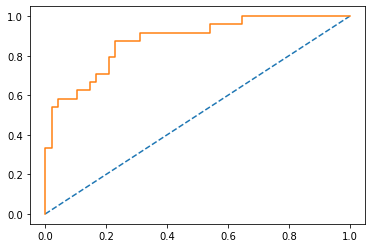

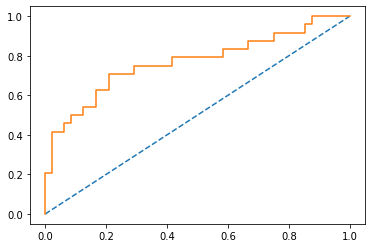

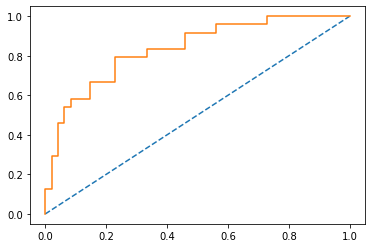

In [35]:
#Since this is a multi-class classificationm we need to ensure our labels follow binary classification logic
#To achieve this target we can use OneVsRestClassifier
#Requirement of OneVsRestClassifier is:
# 1. labels must be numeric in nature
# 2. model algo must support either predict_proba and decision_function


#Lets first encode our labels
from sklearn.preprocessing import label_binarize

y_train_lb = label_binarize(y_train_US, classes=['Negative','Neutral','Positive'])
y_test_lb = label_binarize(y_test_US, classes=['Negative','Neutral','Positive'])

n_classes = y_train_lb.shape[1]

#Create NaiveBayes OneVsRestClassifier Model
from sklearn.multiclass import OneVsRestClassifier

multiClassModel = OneVsRestClassifier(LogisticRegression())
y_score = multiClassModel.fit(X_train_bow_US.toarray(),y_train_lb).predict_proba(X_test_bow_US.toarray())

##############################################################################################################
#Plot ROC-AUC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

fpr=dict()
tpr=dict()
auc =dict()

for i in range(n_classes):
    fpr[i],tpr[i],_ = roc_curve(y_test_lb[:,i], y_score[:,i])
    auc[i] = roc_auc_score(y_test_lb[:,i], y_score[:,i])

for i in range(n_classes):
    plt.figure()
    print('roc_auc_score:',auc[i])
    plt.plot([0,1],[0,1], linestyle = '--')
    plt.plot(fpr[i],tpr[i])

#### Approach-5: Use of Tree-based classifiers - RandomForestClassifier

In [64]:
%%time
from sklearn.ensemble import RandomForestClassifier
#class_weight : {"balanced", "balanced_subsample"}
# Model building using Random Forest classifier
model_RFC=RandomForestClassifier(n_estimators=200,class_weight='balanced')
model_RFC.fit( X_train_bow.toarray(),y_train)

#Get Train and Test Accuracy Score
train_score=model_RFC.score(X_train_bow.toarray(),y_train)
test_score=model_RFC.score(X_test_bow.toarray(),y_test)
print('train score is:{} and test score is: {}'.format(train_score,test_score))

#Get precision    recall  and f1-score on Train data
cr=classification_report(y_true=y_train,y_pred=model_RFC.predict( X_train_bow.toarray() ))
print('classification_report TRAIN Data\n',cr)

#Get precision    recall  and f1-score on Test data
cr=classification_report(y_true=y_test,y_pred=model_RFC.predict( X_test_bow.toarray() ))
print('classification_report TEST Data\n',cr)

train score is:1.0 and test score is: 0.954
classification_report TRAIN Data
               precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        93
     Neutral       1.00      1.00      1.00       158
    Positive       1.00      1.00      1.00      3749

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

classification_report TEST Data
               precision    recall  f1-score   support

    Negative       1.00      0.29      0.45        24
     Neutral       1.00      0.26      0.41        39
    Positive       0.95      1.00      0.98       937

    accuracy                           0.95      1000
   macro avg       0.98      0.52      0.61      1000
weighted avg       0.96      0.95      0.94      1000

Wall time: 14.6 s


#### Approach-6: Use of Tree-based classifiers - XGBoost Classifier

In [125]:
%%time

# Model building using XGBoost Classifier
model_XGBC=XGBClassifier(scale_pos_weight=98)
model_XGBC.fit( X_train_bow.toarray(),y_train)

#Get Train and Test Accuracy Score
train_score=model_XGBC.score(X_train_bow.toarray(),y_train)
test_score=model_XGBC.score(X_test_bow.toarray(),y_test)
print('train score is:{} and test score is: {}'.format(train_score,test_score))

#Note:The XGBoost documentation suggests a fast way to estimate scale_pos_weight value 
#using the training dataset as the total number of examples in the majority class 
#divided by the total number of examples in the minority class

#Get precision    recall  and f1-score on Train data
cr=classification_report(y_true=y_train,y_pred=model_XGBC.predict( X_train_bow.toarray() ))
print('classification_report TRAIN Data\n',cr)

#Get precision    recall  and f1-score on Test data
cr=classification_report(y_true=y_test,y_pred=model_XGBC.predict( X_test_bow.toarray() ))
print('classification_report TEST Data\n',cr)

[11:15:34] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


train score is:0.9905 and test score is: 0.953
classification_report TRAIN Data
               precision    recall  f1-score   support

    Negative       1.00      0.96      0.98        93
     Neutral       1.00      0.78      0.88       158
    Positive       0.99      1.00      0.99      3749

    accuracy                           0.99      4000
   macro avg       1.00      0.91      0.95      4000
weighted avg       0.99      0.99      0.99      4000

classification_report TEST Data
               precision    recall  f1-score   support

    Negative       0.90      0.38      0.53        24
  

#### Observation:

**Summary of Model Testing and Evaluation at end of Week-2**

| Approach | Avg. F-1 Score(Train) | Avg. F-1 Score(Test) | Wt.Avg. F-1 Score(Test) | Accuracy(Test) |
| :--- | :---: | :---: | :---: | :---: |
| 1. Oversampling - Naive Bayes | 97 % | 61 % | 61 % | 61 % |
| 2. Undersampling - Naive Bayes | 95 % | 71 % | 71 % | 71 % |
| 3. Over Sampling - Logistic Regression | 99 % | 62 % | 62 % | 63 % |
| 4. Under Sampling - Logistic Regression | 99 % | 66 % | 66 % | 67 % |
| 5. Random Forest Classifier | 100 % | 61 % | 94 % | 95.4 % |
| 6. XGBoost Classifier | 95 % | 63 % | 94 % | 95.3 % |


---



## Project Task: Week 3

**Model Selection:**
    
1. Apply neural nets and multi-class SVM’s. 

2. Use possible ensemble techniques like: XGboost + oversampled_multinomial_NB.

### Code :

In [ ]:
# Here are the train and test dataset 
# X_train_bow_OS     y_train_OS     --- Over sampling train dataset 
# X_train_bow_US     y_train_US     ----Undersampling train dataset 
# X_test_bow_OS      y_test_OS       ----Over sampling Test dataset
# X_test_bow_US      y_test_US       ----Under sampling Test dataset

In [33]:
#Prepare Data for Neural Network

y_test=test_hidden['sentiment']

#Label encoding for Class
y_train_NN_OS=y_train_OS.replace(['Positive','Negative','Neutral'],[1,0,2]) # Oversampled
y_test_NN_OS=y_test_OS.replace(['Positive','Negative','Neutral'],[1,0,2])   # Oversampled
y_train_NN_US=y_train_US.replace(['Positive','Negative','Neutral'],[1,0,2]) # Undersampled 
y_test_NN_US=y_test_US.replace(['Positive','Negative','Neutral'],[1,0,2])   # Undersampled


#Convert class to catagorical
y_train_NN_OSC = tf.keras.utils.to_categorical(y_train_NN_OS) # Oversampled
y_test_NN_OSC = tf.keras.utils.to_categorical(y_test_NN_OS)   # Oversampled
y_train_NN_USC = tf.keras.utils.to_categorical(y_train_NN_US) # Undersampled
y_test_NN_USC = tf.keras.utils.to_categorical(y_test_NN_US)   # Undersampled

# original dataset
y_train_NN=y_train.replace(['Positive','Negative','Neutral'],[1,0,2])
y_test_NN=y_test.replace(['Positive','Negative','Neutral'],[1,0,2])
y_train_NNC= tf.keras.utils.to_categorical(y_train_NN)
y_test_NNC = tf.keras.utils.to_categorical(y_test_NN)

#### Approach-7: Use of Neural Nets with Oversampled dataset

In [48]:
%%time
#Initialize Sequential model
modelNN_OS = tf.keras.models.Sequential()
# Create Input layer
modelNN_OS.add(tf.keras.layers.Reshape((4342,),input_shape=(4342,)))
#Normalize the data
modelNN_OS.add(tf.keras.layers.BatchNormalization())

#Add 1st hidden layer
modelNN_OS.add(tf.keras.layers.Dense(200, activation='relu'))
modelNN_OS.add(tf.keras.layers.Dropout(0.5)) #Dropout layer
modelNN_OS.add(tf.keras.layers.BatchNormalization())

#Add 2nd hidden layer
modelNN_OS.add(tf.keras.layers.Dense(100, activation='relu'))
modelNN_OS.add(tf.keras.layers.Dropout(0.5)) #Dropout layer
modelNN_OS.add(tf.keras.layers.BatchNormalization())


#Add 3rd hidden layer
modelNN_OS.add(tf.keras.layers.Dense(50, activation='relu'))
modelNN_OS.add(tf.keras.layers.Dropout(0.3)) #Dropout layer
modelNN_OS.add(tf.keras.layers.BatchNormalization())


#Add OUTPUT layer
modelNN_OS.add(tf.keras.layers.Dense(3, activation='softmax'))

#Create optimizer with non-default learning rate
#sgd_optimizer = tf.keras.optimizers.SGD(lr=0.1)

#Compile the model
#modelNN_OS.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

#Compile the model with adam optimizer
modelNN_OS.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the model
modelNN_OS.fit(X_train_bow_OS.toarray(),y_train_NN_OSC,          
          validation_data=(X_test_bow_OS.toarray(),y_test_NN_OSC),
          epochs=100,
          batch_size=32)

Train on 11247 samples, validate on 2811 samples
Epoch 1/100
11247/11247 [==============================] - 4s 350us/sample - loss: 0.5492 - accuracy: 0.7751 - val_loss: 2.2239 - val_accuracy: 0.3333
Epoch 2/100
11247/11247 [==============================] - 3s 269us/sample - loss: 0.1251 - accuracy: 0.9594 - val_loss: 2.1516 - val_accuracy: 0.5311
Epoch 3/100
11247/11247 [==============================] - 3s 280us/sample - loss: 0.0805 - accuracy: 0.9755 - val_loss: 2.5313 - val_accuracy: 0.5390
Epoch 4/100
11247/11247 [==============================] - 3s 277us/sample - loss: 0.0582 - accuracy: 0.9820 - val_loss: 2.3219 - val_accuracy: 0.5841
Epoch 5/100
11247/11247 [==============================] - 4s 328us/sample - loss: 0.0564 - accuracy: 0.9813 - val_loss: 3.4723 - val_accuracy: 0.5297
Epoch 6/100
11247/11247 [==============================] - 4s 317us/sample - loss: 0.0505 - accuracy: 0.9839 - val_loss: 3.0897 - val_accuracy: 0.5589
Epoch 7/100
11247/11247 [====================

In [49]:
# predict  classes
yhat_classes_train = modelNN_OS.predict_classes(X_train_bow_OS.toarray(), verbose=0)
yhat_classes_test = modelNN_OS.predict_classes(X_test_bow_OS.toarray(), verbose=0)

#Accuracy Score for train Data
accuracy_score_train=accuracy_score(y_true=y_train_NN_OS,y_pred=yhat_classes_train)
#Accuracy Score for test Data
accuracy_score_test=accuracy_score(y_true=y_test_NN_OS,y_pred=yhat_classes_test)
print('Train Accuracy score is: {} and Test Accuracy score is: {}'.format(accuracy_score_train,accuracy_score_test))
print('-------------------------------------------------------------------------------------------')

#Classification Report for Train Data
cr=classification_report(y_true=y_train_NN_OS,y_pred=yhat_classes_train)
print('Classification Report for Train Data \n',cr)
print('-------------------------------------------------------------------------------------------')

#Classification Report for Test Data
cr=classification_report(y_true=y_test_NN_OS,y_pred=yhat_classes_test)
print('Classification Report for Test Data \n',cr)



Train Accuracy score is: 0.9985773984173557 and Test Accuracy score is: 0.608680184987549
-------------------------------------------------------------------------------------------
Classification Report for Train Data 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3749
           1       1.00      1.00      1.00      3749
           2       1.00      1.00      1.00      3749

    accuracy                           1.00     11247
   macro avg       1.00      1.00      1.00     11247
weighted avg       1.00      1.00      1.00     11247

-------------------------------------------------------------------------------------------
Classification Report for Test Data 
               precision    recall  f1-score   support

           0       0.90      0.51      0.65       937
           1       0.49      0.95      0.64       937
           2       0.76      0.37      0.50       937

    accuracy                           0.61      2

In [ ]:
# Observations of Neural Network- Oversampled Data
# Num of Layers        batch size     Epochs     optimizer         Train Accuracy   Test Accuracy   f1.Score(Test)
#       3                  32           10          Adam                99.83 %           57.84 %        55.0 %
#       3(WithDropout)     32           10          Adam                99.84 %           55.60 %        53.0 %
#       3                  32           10          Adam                99.83 %          100.00 %        55.9 %
#       3(WithDropout)     32           10          SGD(lr=0.1)         99.85 %           57.56 %        56.0 %


#### Approach-8: Use of Neural Nets with Undersampled dataset

In [146]:
%%time
#Initialize Sequential model
modelNN_US = tf.keras.models.Sequential()
# Create Input layer
modelNN_US.add(tf.keras.layers.Reshape((4342,),input_shape=(4342,)))
#Normalize the data
modelNN_US.add(tf.keras.layers.BatchNormalization())

#Add 1st hidden layer
modelNN_US.add(tf.keras.layers.Dense(200, activation='relu'))
modelNN_OS.add(tf.keras.layers.Dropout(0.5)) #Dropout layer
modelNN_US.add(tf.keras.layers.BatchNormalization())

#Add 2nd hidden layer
modelNN_US.add(tf.keras.layers.Dense(100, activation='relu'))
modelNN_OS.add(tf.keras.layers.Dropout(0.5)) #Dropout layer
modelNN_US.add(tf.keras.layers.BatchNormalization())

#Add 3rd hidden layer
modelNN_US.add(tf.keras.layers.Dense(50, activation='relu'))
modelNN_OS.add(tf.keras.layers.Dropout(0.2)) #Dropout layer
modelNN_US.add(tf.keras.layers.BatchNormalization())


#Add OUTPUT layer
modelNN_US.add(tf.keras.layers.Dense(3, activation='softmax'))

#Create optimizer with non-default learning rate
#sgd_optimizer = tf.keras.optimizers.SGD(lr=0.1)

#Compile the model
#modelNN_US.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

#Compile the model with adam optimizer
modelNN_US.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


## Train the model
modelNN_US.fit(X_train_bow_US.toarray(),y_train_NN_USC,          
          validation_data=(X_test_bow_US.toarray(),y_test_NN_USC),
          epochs=50,
          batch_size=32,verbose=0)

Wall time: 5.48 s


In [147]:
# predict  classes
yhat_classes_train = modelNN_US.predict_classes(X_train_bow_US.toarray(), verbose=0)
yhat_classes_test = modelNN_US.predict_classes(X_test_bow_US.toarray(), verbose=0)

#Accuracy Score for train Data
accuracy_score_train=accuracy_score(y_true=y_train_NN_US,y_pred=yhat_classes_train)
#Accuracy Score for test Data
accuracy_score_test=accuracy_score(y_true=y_test_NN_US,y_pred=yhat_classes_test)
print('Train Accuracy score is: {} and Test Accuracy score is: {}'.format(accuracy_score_train,accuracy_score_test))
print('-------------------------------------------------------------------------------------------')

#Classification Report for Train Data
cr=classification_report(y_true=y_train_NN_US,y_pred=yhat_classes_train)
print('Classification Report for Train Data \n',cr)
print('-------------------------------------------------------------------------------------------')

#Classification Report for Test Data
cr=classification_report(y_true=y_test_NN_US,y_pred=yhat_classes_test)
print('Classification Report for Test Data \n',cr)



Train Accuracy score is: 1.0 and Test Accuracy score is: 0.5694444444444444
-------------------------------------------------------------------------------------------
Classification Report for Train Data 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       1.00      1.00      1.00        93
           2       1.00      1.00      1.00        93

    accuracy                           1.00       279
   macro avg       1.00      1.00      1.00       279
weighted avg       1.00      1.00      1.00       279

-------------------------------------------------------------------------------------------
Classification Report for Test Data 
               precision    recall  f1-score   support

           0       0.67      0.42      0.51        24
           1       0.68      0.62      0.65        24
           2       0.46      0.67      0.54        24

    accuracy                           0.57        72
   macro a

In [ ]:
# Observations of Neural Network- Undersampled Data
# Num of Layers        batch size     Epochs     optimizer         Train Accuracy   Test Accuracy   f1.Score(Test)
#      3                  32           50          SGD(lr=0.1)         100.00 %           60.10 %        61.0 %
#      3(WithDropout)     32           50          SGD(lr=0.1)         100.00 %           63.88 %        64.0 %
#      3(WithDropout)     32           50          adam                 98.92 %           63.88 %        65.3 %

#### Approach-9: Use of Neural Nets with Original dataset(Imbalance Dataset)

In [139]:
%%time
#Initialize Sequential model
modelNN_imb = tf.keras.models.Sequential()
# Create Input layer
modelNN_imb.add(tf.keras.layers.Reshape((4342,),input_shape=(4342,)))
#Normalize the data
modelNN_imb.add(tf.keras.layers.BatchNormalization())

#Add 1st hidden layer
modelNN_imb.add(tf.keras.layers.Dense(200, activation='relu'))
modelNN_imb.add(tf.keras.layers.Dropout(0.5)) #Dropout layer
modelNN_imb.add(tf.keras.layers.BatchNormalization())

#Add 2nd hidden layer
modelNN_imb.add(tf.keras.layers.Dense(100, activation='relu'))
modelNN_imb.add(tf.keras.layers.Dropout(0.5)) #Dropout layer
modelNN_imb.add(tf.keras.layers.BatchNormalization())


#Add 3rd hidden layer
modelNN_imb.add(tf.keras.layers.Dense(50, activation='relu'))
modelNN_imb.add(tf.keras.layers.Dropout(0.2)) #Dropout layer
modelNN_OS.add(tf.keras.layers.BatchNormalization())

#Add OUTPUT layer
modelNN_imb.add(tf.keras.layers.Dense(3, activation='softmax'))

#Create optimizer with non-default learning rate
#sgd_optimizer = tf.keras.optimizers.SGD(lr=0.1)

#Compile the model
#modelNN_imb.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

#Compile the model with adam optimizer
modelNN_imb.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the model
modelNN_imb.fit(X_train_bow.toarray(),y_train_NNC,          
          validation_data=(X_test_bow.toarray(),y_test_NNC),
          epochs=50,
          batch_size=32,verbose=0)

Wall time: 55.5 s


In [141]:
# predict  classes
yhat_classes_train = modelNN_imb.predict_classes(X_train_bow.toarray(), verbose=0)
yhat_classes_test = modelNN_imb.predict_classes(X_test_bow.toarray(), verbose=0)

#Accuracy Score for train Data
accuracy_score_train=accuracy_score(y_true=y_train_NN,y_pred=yhat_classes_train)
#Accuracy Score for test Data
accuracy_score_test=accuracy_score(y_true=y_test_NN,y_pred=yhat_classes_test)
print('Train Accuracy score is: {} and Test Accuracy score is: {}'.format(accuracy_score_train,accuracy_score_test))
print('-------------------------------------------------------------------------------------------')

#Classification Report for Train Data
cr=classification_report(y_true=y_train_NN,y_pred=yhat_classes_train)
print('Classification Report for Train Data \n',cr)
print('-------------------------------------------------------------------------------------------')
#Classification Report for Test Data
cr=classification_report(y_true=y_test_NN,y_pred=yhat_classes_test)
print('Classification Report for Test Data \n',cr)

Train Accuracy score is: 0.9965 and Test Accuracy score is: 0.935
-------------------------------------------------------------------------------------------
Classification Report for Train Data 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        93
           1       1.00      1.00      1.00      3749
           2       0.97      1.00      0.98       158

    accuracy                           1.00      4000
   macro avg       0.96      1.00      0.98      4000
weighted avg       1.00      1.00      1.00      4000

-------------------------------------------------------------------------------------------
Classification Report for Test Data 
               precision    recall  f1-score   support

           0       0.41      0.50      0.45        24
           1       0.97      0.97      0.97       937
           2       0.42      0.44      0.43        39

    accuracy                           0.94      1000
   macro avg       0

In [115]:
# Observations of Neural Network- Original Imbalanced Dataset
# Num of Layers        batch size     Epochs     optimizer         Train Accuracy   Test Accuracy   f1.Score(Test)
#       3                  32           50          Adam                99.60 %           92.00 %        58.0 %
#       3(WithDropout)     32           10          Adam                99.65 %           93.50 %        62.0 %
#       3                  32           10          SGD(lr=0.1)         99.25 %           90.05 %        57.0 %
#       3(WithDropout)     32           10          SGD(lr=0.1)         99.60 %           90.70 %        59.0 %


#### Approach-10: Use of Multiclass SVM with Undersampled dataset

In [117]:
%%time
from sklearn.svm import SVC
#Model building using Multiclass SVM
model_SVC_US = SVC()
model_SVC_US.fit( X_train_bow_US.toarray(),y_train_US)

#Get Train and Test Accuracy Score
train_score=model_SVC_US.score(X_train_bow_US.toarray(),y_train_US)
test_score=model_SVC_US.score(X_test_bow_US.toarray(),y_test_US)
print('train score is:{} '.format(train_score))
print('test score is:{} '.format(test_score))

#Get precision    recall  and f1-score on Train data
cr=classification_report(y_true=y_train_US,y_pred=model_SVC_US.predict( X_train_bow_US.toarray() ))
print(cr)

#Get precision    recall  and f1-score on Test data
cr=classification_report(y_true=y_test_US,y_pred=model_SVC_US.predict( X_test_bow_US.toarray() ))
print(cr)

train score is:1.0 
test score is:0.5972222222222222 
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        93
     Neutral       1.00      1.00      1.00        93
    Positive       1.00      1.00      1.00        93

    accuracy                           1.00       279
   macro avg       1.00      1.00      1.00       279
weighted avg       1.00      1.00      1.00       279

              precision    recall  f1-score   support

    Negative       0.65      0.62      0.64        24
     Neutral       0.50      0.71      0.59        24
    Positive       0.73      0.46      0.56        24

    accuracy                           0.60        72
   macro avg       0.63      0.60      0.60        72
weighted avg       0.63      0.60      0.60        72

Wall time: 1.46 s


#### Approach-11: Use of Multiclass SVM with Oversampled dataset

In [118]:
%%time
#Model building using Multiclass SVM
model_SVC_OS = SVC()
model_SVC_OS.fit( X_train_bow_OS.toarray(),y_train_OS)

#Get Train and Test Accuracy Score
train_score=model_SVC_OS.score(X_train_bow_OS.toarray(),y_train_OS)
test_score=model_SVC_OS.score(X_test_bow.toarray(),y_test)
print('train score is:{} '.format(train_score))
print('test score is:{} '.format(test_score))

#Get precision    recall  and f1-score on Train data
cr=classification_report(y_true=y_train_OS,y_pred=model_SVC_OS.predict( X_train_bow_OS.toarray() ))
print(cr)

#Get precision    recall  and f1-score on Test data
cr=classification_report(y_true=y_test,y_pred=model_SVC_OS.predict( X_test_bow.toarray() ))
print(cr)

train score is:1.0 
test score is:0.954 
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      3749
     Neutral       1.00      1.00      1.00      3749
    Positive       1.00      1.00      1.00      3749

    accuracy                           1.00     11247
   macro avg       1.00      1.00      1.00     11247
weighted avg       1.00      1.00      1.00     11247

              precision    recall  f1-score   support

    Negative       1.00      0.29      0.45        24
     Neutral       1.00      0.26      0.41        39
    Positive       0.95      1.00      0.98       937

    accuracy                           0.95      1000
   macro avg       0.98      0.52      0.61      1000
weighted avg       0.96      0.95      0.94      1000

Wall time: 10min 3s


#### Approach 12: Use of Ensemble Technique(oversampled multinomial_NB+Logistic Regression)

In [126]:
%%time
# 11.Ensemble Learning
from sklearn.ensemble import VotingClassifier
model_ensemble = VotingClassifier([('M1', model_MNB_OS), 
                                  ('M2', model_LR_OS)
                                 ]
                                )
model_ensemble.fit( X_train_bow_OS.toarray(),y_train_OS)
#Get Train and Test Accuracy Score
train_score=model_ensemble.score(X_train_bow_OS.toarray(),y_train_OS)
test_score=model_ensemble.score(X_test_bow_OS.toarray(),y_test_OS)
print('train score is:{} and test score is: {}'.format(train_score,test_score))

#Get precision    recall  and f1-score on Train data
cr=classification_report(y_true=y_train_OS,y_pred=model_ensemble.predict( X_train_bow_OS.toarray() ))
print('classification_report TRAIN Data\n',cr)

#Get precision    recall  and f1-score on Test data
cr=classification_report(y_true=y_test_OS,y_pred=model_ensemble.predict( X_test_bow_OS.toarray() ))
print('classification_report TEST Data\n',cr)

train score is:0.9723481817373522 and test score is: 0.6360725720384205
classification_report TRAIN Data
               precision    recall  f1-score   support

    Negative       0.98      1.00      0.99      3749
     Neutral       0.94      1.00      0.97      3749
    Positive       1.00      0.92      0.96      3749

    accuracy                           0.97     11247
   macro avg       0.97      0.97      0.97     11247
weighted avg       0.97      0.97      0.97     11247

classification_report TEST Data
               precision    recall  f1-score   support

    Negative       0.87      0.59      0.70       937
     Neutral       0.65      0.45      0.54       937
    Positive       0.53      0.86      0.66       937

    accuracy                           0.64      2811
   macro avg       0.68      0.64      0.63      2811
weighted avg       0.68      0.64      0.63      2811

Wall time: 5.96 s


#### Approach 13: Use of Ensemble Technique(oversampled_multinomial_NB+XGboost)

In [127]:
%%time
# 11.Ensemble Learning
from sklearn.ensemble import VotingClassifier
model_ensemble = VotingClassifier([('M1', model_MNB_OS), 
                                  ('M2', model_XGBC)
                                 ]
                                )
model_ensemble.fit( X_train_bow_OS.toarray(),y_train_OS)
#Get Train and Test Accuracy Score
train_score=model_ensemble.score(X_train_bow_OS.toarray(),y_train_OS)
test_score=model_ensemble.score(X_test_bow_OS.toarray(),y_test_OS)
print('train score is:{} and test score is: {}'.format(train_score,test_score))

#Get precision    recall  and f1-score on Train data
cr=classification_report(y_true=y_train_OS,y_pred=model_ensemble.predict( X_train_bow_OS.toarray() ))
print('classification_report TRAIN Data\n',cr)

#Get precision    recall  and f1-score on Test data
cr=classification_report(y_true=y_test_OS,y_pred=model_ensemble.predict( X_test_bow_OS.toarray() ))
print('classification_report TEST Data\n',cr)

[11:16:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


train score is:0.9731483951275895 and test score is: 0.6705798648167912
classification_report TRAIN Data
               precision    recall  f1-score   support

    Negative       0.98      1.00      0.99      3749
     Neutral       0.95      1.00      0.97      3749
    Positive       1.00      0.92      0.96      3749

    accuracy                           0.97     11247
   macro avg       0.97      0.97      0.97     11247
weighted avg       0.97      0.97      0.97     11247

classification_report TEST Data
               precision    recall  f1-score   support

    Negative       0.84      0.

#### Observation:

**Summary of Model Testing and Evaluation at end of Week-3**

| Approach | Avg. F-1 Score(Train) | Avg. F-1 Score(Test) | Wt.Avg. F-1 Score(Test) | Accuracy(Test) |
| :--- | :---: | :---: | :---: | :---: |
| 1. Oversampling - Naive Bayes | 97 % | 61 % | 61 % | 61 % |
| 2. Undersampling - Naive Bayes | 95 % | 71 % | 71 % | 71 % |
| 3. Over Sampling - Logistic Regression | 99 % | 62 % | 62 % | 63 % |
| 4. Under Sampling - Logistic Regression | 99 % | 66 % | 66 % | 67 % |
| 5. Random Forest Classifier | 100 % | 61 % | 94 % | 95 % |
| 6. XGBoost Classifier | 95 % | 63 % | 94 % | 95 % |
| 7. Over Sampling - Neural Network | 100 % | 58 % | 58 % | 58 % |
| 8. Under Sampling - Neural Network | 100 % | 57 % | 57 % | 57 % |
| 9. Neural Network with Original data(imbalance dataset) | 98 % | 62 % | 94 % | 94 % |
| 10. Oversampling - SVM | 100 % | 61 % | 94 % | 95 % |
| 11. Undersampling - SVM | 100 % | 60 % | 60 % | 60 % |
| 12. Ensemble Technique(Oversampled Naive Bayes+LogisticReg) | 97 % | 63 % | 63 % | 64 % |
| 13. Ensemble Technique(Oversampled Naive Bayes+XGBoost) | 97 % | 67 % | 67 % | 67 % |


## Week4 Tasks: Approach 14: Implement LSTM

## Project Task: Week 4

**Applying LSTM::**
    
1. Use LSTM for the previous problem (use parameters of LSTM like top-word, embedding-length, Dropout, epochs, number of layers, etc.). 

2. Compare the accuracy of neural nets with traditional ML based algorithms.

3. Find the best setting of LSTM (Neural Net) that can best classify the reviews as positive, negative, and neutral.


### Code :

In [21]:
# AS LSTM is memory intensive lets take 30% of the data and test it

#Lets take only relevent columns for the preprocessing of Train Data(reviews.text and sentiment)
traindata=train[['reviews.text','sentiment']]
traindata= traindata.sample(frac=0.3,random_state=1)

#Lets take only relevent columns for the preprocessing of Test Data (reviews.text and sentiment)
testdata=test_hidden[['reviews.text','sentiment']]
testdata= testdata.sample(frac=0.3,random_state=1)

train_clean_reviews=text_preprocessing(traindata)
test_clean_reviews=text_preprocessing(testdata)

Text Preprocessing Step-1:Converting to list for easy manipulation 
 Works as expected. Very easy to use and does not hurt my eyes like a tablet would. 

Text Preprocessing Step-2&3:Word standardize and Tokenize 
 ['works', 'as', 'expected', '.', 'very', 'easy', 'to', 'use', 'and', 'does', 'not', 'hurt', 'my', 'eyes', 'like', 'a', 'tablet', 'would', '.'] 

Text Preprocessing Step-5:Remove stop words and punctuations 
 ['works', 'expected', 'easy', 'use', 'hurt', 'eyes', 'like', 'tablet', 'would'] 

Text Preprocessing Step-6:lemmatized_docs 
 ['work', 'expected', 'easy', 'use', 'hurt', 'eye', 'like', 'tablet', 'would'] 

Text Preprocessing Step-7:Delete numeric tokens 
 ['work', 'expected', 'easy', 'use', 'hurt', 'eye', 'like', 'tablet', 'would'] 

Text Preprocessing Step-8:Clean  documents 
 work expected easy use hurt eye like tablet would 

Text Preprocessing Step-1:Converting to list for easy manipulation 
 Works good. Have to be very careful with kids. Overall good product 

Text P

In [23]:
#Prepare Data for Neural Network
X_train=train_clean_reviews
X_test=test_clean_reviews
y_train=traindata['sentiment']
y_test=testdata['sentiment']


#Label encoding for Class
y_train_NN=y_train.replace(['Positive','Negative','Neutral'],[1,0,2])
y_test_NN=y_test.replace(['Positive','Negative','Neutral'],[1,0,2])
# and Convert class to catagorical
y_train_NNC= tf.keras.utils.to_categorical(y_train_NN)
y_test_NNC = tf.keras.utils.to_categorical(y_test_NN)

print('the shape of X_train and  y_train: ', len(X_train), y_train.shape)
print('the shape of X_test and  y_test: ', len(X_test),y_test.shape)

the shape of X_train and  y_train:  1200 (1200,)
the shape of X_test and  y_test:  300 (300,)


## Lets build the Word2Vec Model from Gensim

In [24]:
### Convert Review to a Word List
#List to hold all words in each review
documents = []

#Iterate over each review
for doc in fulldata_clean_reviews:
    documents.append(doc.split(' '))

print(len(documents))


5000


In [25]:
#Build the model
model= gensim.models.Word2Vec(documents, #Word list
                               min_count=10, #Ignore all words with total frequency lower than this                           
                               workers=4, #Number of CPU Cores
                               size=50,  #Embedding size
                               window=5, #Maximum Distance between current and predicted word
                               iter=10   #Number of iterations over the text corpus
                              )  

### Saving the model

In [26]:
model.save('word2vec-ecomm')
#Load model from memory
#model = gensim.models.Word2Vec.load('word2vec-ecomm')

In [27]:
#1.Build Tokenizer to get Number sequences for Each review
from tensorflow.python.keras.preprocessing.text import Tokenizer

#Vocab size
top_words = 5000

t = Tokenizer(num_words=top_words)
t.fit_on_texts(X_train)

#2.Get the word index for each of the word in the review
X_train = t.texts_to_sequences(X_train)
X_test = t.texts_to_sequences(X_test)

In [28]:
#Maximum review length
print('Maximum review length: {}'.format(
len(max((X_train + X_test), key=len))))

#Minimum review length.
print('Minimum review length: {}'.format(
len(min((X_test + X_test), key=len))))

Maximum review length: 773
Minimum review length: 3


In [29]:
#3.Limit the maximum review length to max_words by truncating longer reviews and padding shorter reviews 
# with a null value.
from tensorflow.python.keras.preprocessing import sequence

#Each review size
max_review_length = 500

X_train = sequence.pad_sequences(X_train,maxlen=max_review_length,padding='post')
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length, padding='post')

## Build Embedding Matrix from Pre-Trained Word2Vec model

In [30]:
#Load pre-trained model
word2vec = gensim.models.Word2Vec.load('word2vec-ecomm')
#word2vec = gensim.models.Word2Vec.load('word2vec-movie-ratings')


#Embedding Length
embedding_vector_length = word2vec.wv.vectors.shape[1]

print('Loaded word2vec model..')
print('Model shape: ', word2vec.wv.vectors.shape)

#Initialize embedding matrix to all zeros
embedding_matrix = np.zeros((top_words + 1, embedding_vector_length))

#Steps for populating embedding matrix

#1. Check each word in tokenizer vocablury to see if it exist in pre-trained
# word2vec model.
#2. If found, update embedding matrix with embeddings for the word 
# from word2vec model

for word, i in sorted(t.word_index.items(),key=lambda x:x[1]):
    if i > top_words:
        break
    if word in word2vec.wv.vocab:
        embedding_vector = word2vec.wv[word]
        embedding_matrix[i] = embedding_vector

Loaded word2vec model..
Model shape:  (1009, 50)


## Build the Graph

In [31]:
import tensorflow as tf
tf.keras.backend.clear_session()
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dropout, Dense, Embedding, Flatten,LSTM

Add Embedding layer

In [33]:
#Build a sequential model
model_LSTM = Sequential()

model_LSTM.add(Embedding(top_words + 1, #Indexes that we need to deal with                    
                    embedding_vector_length, #embedding_size i.e 50 in this case
                    input_length=max_review_length, #Size of each review i.e 300 in this case
                    weights=[embedding_matrix], #This can be also a Pre-trained embedding
                    trainable=False   #This can set to False incase of pretrained model
                   )
         )

#model_LSTM.add(LSTM(200,activation='relu',return_sequences=True))
#model_LSTM.add(Dropout(0.5))
#model_LSTM.add(tf.keras.layers.BatchNormalization())

#model_LSTM.add(LSTM(100,activation='relu',return_sequences=True))
#model_LSTM.add(Dropout(0.4))
#model_LSTM.add(tf.keras.layers.BatchNormalization())

model_LSTM.add(LSTM(100,activation='relu'))
#model_LSTM.add(Dropout(0.3))
model_LSTM.add(tf.keras.layers.BatchNormalization())

model_LSTM.add(Dense(50,activation='relu'))
#model_LSTM.add(Dropout(0.3))
model_LSTM.add(tf.keras.layers.BatchNormalization())


model_LSTM.add(Dense(3,activation='softmax'))

model_LSTM.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Execute the graph

In [46]:
%%time
model_LSTM.fit(X_train,y_train_NNC,
          epochs=10,
          batch_size=64,          
          validation_data=(X_test, y_test_NNC))

Train on 1200 samples, validate on 300 samples
Epoch 1/10
1200/1200 [==============================] - 23s 20ms/sample - loss: 1.0552 - accuracy: 0.7833 - val_loss: 0.9662 - val_accuracy: 0.9500
Epoch 2/10
1200/1200 [==============================] - 21s 18ms/sample - loss: 0.9284 - accuracy: 0.9300 - val_loss: 0.8253 - val_accuracy: 0.9500
Epoch 3/10
1200/1200 [==============================] - 22s 18ms/sample - loss: 0.7837 - accuracy: 0.9308 - val_loss: 0.6913 - val_accuracy: 0.9500
Epoch 4/10
1200/1200 [==============================] - 22s 18ms/sample - loss: 0.6453 - accuracy: 0.9325 - val_loss: 0.5447 - val_accuracy: 0.9500
Epoch 5/10
1200/1200 [==============================] - 22s 18ms/sample - loss: 0.5213 - accuracy: 0.9308 - val_loss: 0.4390 - val_accuracy: 0.9500
Epoch 6/10
1200/1200 [==============================] - 22s 18ms/sample - loss: 0.4223 - accuracy: 0.9325 - val_loss: 0.3455 - val_accuracy: 0.9500
Epoch 7/10
1200/1200 [==============================] - 22s 18ms/

In [47]:
# predict  classes
yhat_classes_train = model_LSTM.predict_classes(X_train, verbose=0)
yhat_classes_test = model_LSTM.predict_classes(X_test, verbose=0)

#Classification Report for Train Data
cr=classification_report(y_true=y_train_NN,y_pred=yhat_classes_train)
print('Classification Report for Train Data \n',cr)
print('-------------------------------------------------------------------------------------------')

#Classification Report for Test Data
cr=classification_report(y_true=y_test_NN,y_pred=yhat_classes_test)
print('Classification Report for Test Data \n',cr)

Classification Report for Train Data 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.93      1.00      0.97      1119
           2       0.00      0.00      0.00        54

    accuracy                           0.93      1200
   macro avg       0.31      0.33      0.32      1200
weighted avg       0.87      0.93      0.90      1200

-------------------------------------------------------------------------------------------
Classification Report for Test Data 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.95      1.00      0.97       285
           2       0.00      0.00      0.00        10

    accuracy                           0.95       300
   macro avg       0.32      0.33      0.32       300
weighted avg       0.90      0.95      0.93       300



### Lets do Cross validation and see if there is any improvement in the score
    We will select top 3 models and perform cross validations and select the best model post crosss validation
    Here are the steps for CV 
    Step1: Cross validate with StratifiedKFold with 10 splits
           Select those model which has highest F1 scores with minimum standard deviation 
    Step2: Identify which splits(among 10 splits) gives the best Train and Test sample
    Step3: Extract the best Sample and Refit the model with the best train sample
    Step4: Predict with Unseen Test Data and find out Classification report


In [68]:
COLUMN_NAMES = ["Approach","Model Name", "F1 Scores","Range of F1 Scores","Std Deviation of F1 Scores"]
df_model_selection = pd.DataFrame(columns=COLUMN_NAMES)


from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
#from sklearn import metrics

def model_traintest_CV(model_obj, model_name, approach, n_splits, X, y):
    global df_model_selection
    
    skf = StratifiedKFold(n_splits, random_state=12,shuffle=True)
    
    weighted_f1_score = []
    
    for train_index, test_index in skf.split(X,y):
        X_train, X_test = X[train_index], X[test_index] 
        y_train, y_test = y[train_index], y[test_index]
        
        model_obj.fit(X_train,y_train)
        
        test_ds_predicted = model_obj.predict( X_test )
        
        weighted_f1_score.append(round(f1_score(y_true=y_test, y_pred=test_ds_predicted , average='weighted'),2))   
         
    sd_weighted_f1_score = np.std(weighted_f1_score, ddof=1)
    range_of_f1_scores = "{}-{}".format(min(weighted_f1_score),max(weighted_f1_score))    
    df_model_selection = pd.concat([df_model_selection,pd.DataFrame([[approach,model_name,sorted(weighted_f1_score),range_of_f1_scores,sd_weighted_f1_score]], columns =COLUMN_NAMES) ])


#### Step1: Cross validate with StratifiedKFold with 10 splits

In [ ]:
%%time
COLUMN_NAMES = ["Approach","Model Name", "F1 Scores","Range of F1 Scores","Std Deviation of F1 Scores"]
df_model_selection = pd.DataFrame(columns=COLUMN_NAMES)


n_splits = 10
X=X_train_bow.toarray()
y=y_train


# 1.RandomForestClassifier
approach='RandomForestClassifier with Cross Validation'
model_RFC=RandomForestClassifier(n_estimators=200,class_weight='balanced')
model_obj=model_RFC
model_name='RandomForest Classifier'
model_traintest_CV(model_obj, model_name, approach, n_splits, X, y)

# 2.XGBoost Classifier
approach='XGBoost Classifier with Cross Validation'
model_XGBC=XGBClassifier()
model_obj=model_XGBC
model_name='XGBoost Classifier'
model_traintest_CV(model_obj, model_name, approach, n_splits, X, y)

#3.Undersampling - Naive Bayes
X=X_train_bow_US.toarray()
y=y_train_US
approach='Undersampling - Multinomial Naive Bayes with Cross Validation'
model_MNB = MultinomialNB()
model_obj=model_MNB
model_name='Multinomial Naive Bayes'
model_traintest_CV(model_obj, model_name, approach, n_splits, X, y)

df_model_selection

In [85]:
df_model_selection

,Approach,Model Name,F1 Scores,Range of F1 Scores,Std Deviation of F1 Scores
0,RandomForestClassifier with Cross Validation,RandomForest Classifier,"[0.92, 0.92, 0.92, 0.92, 0.93, 0.93, 0.93, 0.9...",0.92-0.94,0.008756
0,XGBoost Classifier with Cross Validation,XGBoost Classifier,"[0.92, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.9...",0.92-0.94,0.006325
0,Undersampling - Multinomial Naive Bayes with C...,Multinomial Naive Bayes,"[0.52, 0.53, 0.56, 0.56, 0.58, 0.6, 0.6, 0.61,...",0.52-0.74,0.062370


#### Step2: Identify which splits(among 10 splits) gives the best Train and Test sample

In [73]:
%%time
# Now lets try to get the Scores using StratifiedKFold Cross Validation for RandomForest Classifier

#Initialize the algo
model=RandomForestClassifier(n_estimators=200,class_weight='balanced')
X=X_train_bow.toarray()
y=y_train

#Initialize StratifiedKFold Method
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, 
              random_state=1,
              shuffle=True)

#Initialize For Loop 

i=0
for train,test in kfold.split(X,y):
    i = i+1
    X_train,X_test = X[train],X[test]
    y_train,y_test = y[train],y[test]
    
    model.fit(X_train,y_train)
    test_ds_predicted=model.predict(X_test)
    train_ds_predicted=model.predict(X_train)
    
    test_f1_score=round(f1_score(y_true=y_test, y_pred=test_ds_predicted , average='weighted'),2)
    train_f1_score=round(f1_score(y_true=y_train, y_pred=train_ds_predicted , average='weighted'),2)
    
    #print("Train Score: {}, Test score: {}, for Sample Split: {}".format(model.score(X_train,y_train),model.score(X_test,y_test),i))
    print("Train f1-Score: {}, Test f1-score: {}, for Sample Split: {}".format(train_f1_score,test_f1_score,i))
        

Train f1-Score: 1.0, Test f1-score: 0.92, for Sample Split: 1
Train f1-Score: 1.0, Test f1-score: 0.94, for Sample Split: 2
Train f1-Score: 1.0, Test f1-score: 0.93, for Sample Split: 3
Train f1-Score: 1.0, Test f1-score: 0.94, for Sample Split: 4
Train f1-Score: 1.0, Test f1-score: 0.94, for Sample Split: 5
Train f1-Score: 1.0, Test f1-score: 0.93, for Sample Split: 6
Train f1-Score: 1.0, Test f1-score: 0.94, for Sample Split: 7
Train f1-Score: 1.0, Test f1-score: 0.91, for Sample Split: 8
Train f1-Score: 1.0, Test f1-score: 0.93, for Sample Split: 9
Train f1-Score: 1.0, Test f1-score: 0.92, for Sample Split: 10
Wall time: 2min 1s


#### Step3: Extract the best Sample and Refit the model with the best train sample

In [74]:
#From above results we can extract the best Train and Test sample from either from split 2,4,5 or 7
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, #n_splits should be equal to no of cv value in cross_val_score
              random_state=1,
              shuffle=True)
i=0
for train,test in kfold.split(X,y):
    i = i+1
    if i == 2:
        X_train,X_test,y_train,y_test = X[train],X[test],y[train],y[test]

In [75]:
#Now Lets fit the model with above X_train,X_test 
finalModel=RandomForestClassifier(n_estimators=200,class_weight='balanced')
finalModel.fit(X_train,y_train)

test_ds_predicted=model.predict(X_test)
train_ds_predicted=model.predict(X_train)

test_f1_score=round(f1_score(y_true=y_test, y_pred=test_ds_predicted , average='weighted'),2)
train_f1_score=round(f1_score(y_true=y_train, y_pred=train_ds_predicted , average='weighted'),2)
print("Train f1-Score: {}, Test f1-score: {}".format(train_f1_score,test_f1_score))


train_score=np.round(finalModel.score(X_train,y_train),2)
test_score=np.round(finalModel.score(X_test,y_test),2)
print('Train Accuracy Score is:{} and  Test Accuracy Score:{}'.format(train_score,test_score))

Train f1-Score: 0.99, Test f1-score: 1.0
Train Accuracy Score is:1.0 and  Test Accuracy Score:0.95


#### Step4: Predict with Unseen Test Data and find out Classification report

In [81]:
#Now Lets get the performance Report from Unseen Test Data(X_test_bow)

y_test_actual=test_hidden['sentiment']

train_score=finalModel.score(X_train,y_train)
test_score=finalModel.score(X_test_bow.toarray(),y_test_actual)
print('train score is:{} and test score is: {}'.format(train_score,test_score))

#Get precision    recall  and f1-score on Train data
cr=classification_report(y_true=y_train,y_pred=finalModel.predict( X_train ))
print('classification_report TRAIN Data\n',cr)

#Get precision    recall  and f1-score on Test data
cr=classification_report(y_true=y_test_actual,y_pred=finalModel.predict( X_test_bow.toarray() ))
print('classification_report TEST Data\n',cr)

train score is:1.0 and test score is: 0.952
classification_report TRAIN Data
               precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        84
     Neutral       1.00      1.00      1.00       142
    Positive       1.00      1.00      1.00      3374

    accuracy                           1.00      3600
   macro avg       1.00      1.00      1.00      3600
weighted avg       1.00      1.00      1.00      3600

classification_report TEST Data
               precision    recall  f1-score   support

    Negative       1.00      0.29      0.45        24
     Neutral       1.00      0.21      0.34        39
    Positive       0.95      1.00      0.98       937

    accuracy                           0.95      1000
   macro avg       0.98      0.50      0.59      1000
weighted avg       0.95      0.95      0.94      1000



#### Conclusion after Cross Validation
    Even after 10 fold Startified Cross validation , the f1 score and accuracy score did not change much.
    This clearly explains for the fact that there is no scope for improving the performance unless we optimize the input data

#### Observation:

**Summary of Model Testing and Evaluation at end of Week-3**

| Approach | Avg. F-1 Score(Train) | Avg. F-1 Score(Test) | Wt.Avg. F-1 Score(Test) | Accuracy(Test) |
| :--- | :---: | :---: | :---: | :---: |
| 1. Oversampling - Naive Bayes | 97 % | 61 % | 61 % | 61 % |
| 2. Undersampling - Naive Bayes | 95 % | 71 % | 71 % | 71 % |
| 3. Over Sampling - Logistic Regression | 99 % | 62 % | 62 % | 63 % |
| 4. Under Sampling - Logistic Regression | 99 % | 66 % | 66 % | 67 % |
| 5. Random Forest Classifier | 100 % | 61 % | 94 % | 95 % |
| 6. XGBoost Classifier | 95 % | 63 % | 94 % | 95 % |
| 7. Over Sampling - Neural Network | 100 % | 58 % | 58 % | 58 % |
| 8. Under Sampling - Neural Network | 100 % | 57 % | 57 % | 57 % |
| 9. Neural Network with Original data(imbalance dataset) | 98 % | 62 % | 94 % | 94 % |
| 10. Oversampling - SVM | 100 % | 61 % | 94 % | 95 % |
| 11. Undersampling - SVM | 100 % | 60 % | 60 % | 60 % |
| 12. Ensemble Technique(Oversampled Naive Bayes+LogisticReg) | 97 % | 63 % | 63 % | 64 % |
| 13. Ensemble Technique(Oversampled Naive Bayes+XGBoost) | 97 % | 67 % | 67 % | 67 % |
| 14. LSTM | 32 % | 32 % | 93 % | 95 % |

 **Note: Below are some of the different options tried out and summary of observation**
    1. Executed LSTM with single layer with whole dataset ( It could not be executed becase of huge resource requirement)
    2. Executed LSTM with single layer with 30% of data: Accuracy was around 95%. However   F-1 score for -ve and neutral
     sentiments could not be performed well. 
    3. Tried with valious combinationes of optimizers(SGG, rmsprop).Tried with various combinations of epochs, batch sizes
    4. Tried with different combinations of Topwords, Max review lengths, embedding vector length etc.
    5. Tried with 2 hidden layers but it could not be executed. 
    
    
    In summary, LSTM is the least performing model as compared to  Traditional Neural Network and othef ML models used 
    for this usecase.
    The primary reason for poor LSTM performance is because we need a pretrained  Corpus specific to this domain 
    so that model can utilize the  power of word embedding. 
    
    The best performing models for this usecase are below
    1.Random Forest Classifier with wt.Avg F1-score of 94% 
    2.XGBoost Classifier with wt.Avg F1-score of 94% 
    3.Neural Network with Original data(imbalance dataset) wt.Avg F1-score of 94% 
    
    If we consider the Average F1 score criteria, then the best performing model is Naive Bayes with Undersampled data. 


## Project Task: Week 4

**Topic Modeling:**
    


### Code :

In [88]:
train=pd.read_csv('train_data.csv')
test_hidden=pd.read_csv('test_data_hidden.csv')
test=pd.read_csv('test_data.csv')


In [89]:
#Merge Train and Test data for Topic Modeling
dataSet=pd.concat([train,test_hidden])
print('shape of merged data is: ',dataSet.shape)
dataSet.head()

shape of merged data is:  (5000, 8)


,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [90]:
#Lets take only relevent columns for the preprocessing of Full Dataset (reviews.text and sentiment)
fulldata=dataSet[['reviews.text','sentiment']]
# Data Preprocessing and getthe clean reviews
fulldata_clean_reviews=text_preprocessing(fulldata)

Text Preprocessing Step-1:Converting to list for easy manipulation 
 Purchased on Black FridayPros - Great Price (even off sale)Very powerful and fast with quad core processors Amazing soundWell builtCons -Amazon ads, Amazon need this to subsidize the tablet and will remove the adds if you pay them $15.Inability to access other apps except the ones from Amazon. There is a way which I was able to accomplish to add the Google Play storeNet this is a great tablet for the money 

Text Preprocessing Step-2&3:Word standardize and Tokenize 
 ['purchased', 'on', 'black', 'fridaypros', '-', 'great', 'price', '(', 'even', 'off', 'sale', ')', 'very', 'powerful', 'and', 'fast', 'with', 'quad', 'core', 'processors', 'amazing', 'soundwell', 'builtcons', '-amazon', 'ads', ',', 'amazon', 'need', 'this', 'to', 'subsidize', 'the', 'tablet', 'and', 'will', 'remove', 'the', 'adds', 'if', 'you', 'pay', 'them', '$', '15.inability', 'to', 'access', 'other', 'apps', 'except', 'the', 'ones', 'from', 'amazon', 

In [91]:
#Lets extract  the clean tokens back from each review
# Tokenization
from nltk.tokenize import word_tokenize
tokenizedComments=[word_tokenize(doc) for doc in fulldata_clean_reviews]
tokenizedComments[2]

['average', 'alexa', 'option', 'show', 'thing', 'screen', 'still', 'limited']

In [92]:
# POS Tagging
# Why POS tagging is done ?
#  1. First: For understanding the structure of a sentence.
#  2. Second: For being able to extract a perticular kind of words.
posTagged=[]
for comments in tokenizedComments:
    posTagged.append(nltk.pos_tag(comments))
posTagged[2]

[('average', 'JJ'),
 ('alexa', 'JJ'),
 ('option', 'NN'),
 ('show', 'NN'),
 ('thing', 'NN'),
 ('screen', 'NN'),
 ('still', 'RB'),
 ('limited', 'VBD')]

In [93]:
#Find out all the POS tags that correspond to nouns OR adjectives.
extractedData=[]
for posTaggedComment in posTagged:
    extractedData.append([word for (word, pos) in posTaggedComment if ((pos[0] == 'N')| (pos[0] == 'J'))])
    #onlyNouns.append([word for (word, pos) in posTaggedComment if pos[0] == 'N'])


In [94]:
## Lets do LDA ( Latent Dirchlet Allocation) for Topic Modeling
#1.Create Dictionary
dictionary = gensim.corpora.Dictionary(extractedData)

bow_corpus = [dictionary.doc2bow(doc) for doc in extractedData]

# LDA Modeling
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 10, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [95]:
## Print the Topic
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.033*"product" + 0.027*"great" + 0.019*"tablet" + 0.018*"best" + 0.017*"time" + 0.016*"amazon" + 0.016*"happy" + 0.015*"buy" + 0.013*"fire" + 0.012*"screen"


Topic: 1 
Words: 0.036*"great" + 0.019*"book" + 0.019*"daughter" + 0.018*"life" + 0.017*"tablet" + 0.017*"battery" + 0.017*"easy" + 0.016*"thing" + 0.014*"read" + 0.014*"awesome"


Topic: 2 
Words: 0.044*"kindle" + 0.016*"light" + 0.015*"smart" + 0.015*"device" + 0.012*"hub" + 0.012*"second" + 0.012*"echo" + 0.011*"love" + 0.011*"item" + 0.011*"fire"


Topic: 3 
Words: 0.044*"love" + 0.025*"old" + 0.021*"year" + 0.021*"great" + 0.017*"tablet" + 0.016*"gift" + 0.015*"kindle" + 0.015*"product" + 0.014*"christmas" + 0.014*"game"


Topic: 4 
Words: 0.036*"music" + 0.034*"alexa" + 0.021*"great" + 0.020*"echo" + 0.020*"product" + 0.018*"show" + 0.017*"family" + 0.017*"thing" + 0.015*"device" + 0.014*"use"


Topic: 5 
Words: 0.068*"use" + 0.066*"easy" + 0.023*"screen" + 0.018*"amazon" + 0.015*"love" + 0.012*"echo" + 0.

In [96]:
#Find out coherence of the model 
from gensim.models.coherencemodel import CoherenceModel
def compute_coherence_values(corpus,texts, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b,
                                           per_word_topics=True
                                          )
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [97]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 3
max_topics = 19
step_size = 3
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))

# Validation sets
num_of_docs = len(bow_corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(bow_corpus, num_of_docs*0.75).corpus, 
               bow_corpus]

In [294]:
%%time
## Grid Search Code
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=126)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv =0
                    #print( "i is {}, k is {}, a is {}, b is {}".format(i,k,a,b) )
                    cv = compute_coherence_values(corpus_sets[i],extractedData, dictionary,k, a, b)
                    print( "i is {}, k is {}, a is {}, b is {} and final cv is {}".format(i,k,a,b,cv) )
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
        pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
        pbar.close()


  1%|▋                                                                                 | 1/126 [00:10<22:09, 10.64s/it]

i is 0, k is 3, a is 0.01, b is 0.01 and final cv is 0.3164943350022172



  2%|█▎                                                                                | 2/126 [00:21<21:53, 10.59s/it]

i is 0, k is 3, a is 0.01, b is 0.31 and final cv is 0.3135951219821799



  2%|█▉                                                                                | 3/126 [00:32<22:02, 10.75s/it]

i is 0, k is 3, a is 0.01, b is 0.61 and final cv is 0.3241904478754909



  3%|██▌                                                                               | 4/126 [00:45<23:14, 11.43s/it]

i is 0, k is 3, a is 0.01, b is 0.9099999999999999 and final cv is 0.31623756107140094



  4%|███▎                                                                              | 5/126 [00:58<24:13, 12.01s/it]

i is 0, k is 3, a is 0.31, b is 0.01 and final cv is 0.32450808891717636



  5%|███▉                                                                              | 6/126 [01:12<25:18, 12.65s/it]

i is 0, k is 3, a is 0.31, b is 0.31 and final cv is 0.3021119765206885



  6%|████▌                                                                             | 7/126 [01:27<26:12, 13.22s/it]

i is 0, k is 3, a is 0.31, b is 0.61 and final cv is 0.3161258703615957



  6%|█████▏                                                                            | 8/126 [01:41<26:36, 13.53s/it]

i is 0, k is 3, a is 0.31, b is 0.9099999999999999 and final cv is 0.3126492957242999



  7%|█████▊                                                                            | 9/126 [01:54<26:18, 13.49s/it]

i is 0, k is 3, a is 0.61, b is 0.01 and final cv is 0.31783566085677745



  8%|██████▍                                                                          | 10/126 [02:09<26:30, 13.71s/it]

i is 0, k is 3, a is 0.61, b is 0.31 and final cv is 0.328794722284171



  9%|███████                                                                          | 11/126 [02:23<26:28, 13.82s/it]

i is 0, k is 3, a is 0.61, b is 0.61 and final cv is 0.3266205412536192



 10%|███████▋                                                                         | 12/126 [02:37<26:41, 14.05s/it]

i is 0, k is 3, a is 0.61, b is 0.9099999999999999 and final cv is 0.3267435146391063



 10%|████████▎                                                                        | 13/126 [02:51<25:59, 13.80s/it]

i is 0, k is 3, a is 0.9099999999999999, b is 0.01 and final cv is 0.3143468216909339



 11%|█████████                                                                        | 14/126 [03:03<25:10, 13.49s/it]

i is 0, k is 3, a is 0.9099999999999999, b is 0.31 and final cv is 0.31316458855886004



 12%|█████████▋                                                                       | 15/126 [03:17<25:15, 13.65s/it]

i is 0, k is 3, a is 0.9099999999999999, b is 0.61 and final cv is 0.31064036005639034



 13%|██████████▎                                                                      | 16/126 [03:31<25:16, 13.79s/it]

i is 0, k is 3, a is 0.9099999999999999, b is 0.9099999999999999 and final cv is 0.3139895680333741



 13%|██████████▉                                                                      | 17/126 [03:44<24:34, 13.53s/it]

i is 0, k is 6, a is 0.01, b is 0.01 and final cv is 0.4172630712416318



 14%|███████████▌                                                                     | 18/126 [03:58<24:18, 13.51s/it]

i is 0, k is 6, a is 0.01, b is 0.31 and final cv is 0.4184617226099641



 15%|████████████▏                                                                    | 19/126 [04:12<24:16, 13.62s/it]

i is 0, k is 6, a is 0.01, b is 0.61 and final cv is 0.3664145632874985



 16%|████████████▊                                                                    | 20/126 [04:25<23:43, 13.43s/it]

i is 0, k is 6, a is 0.01, b is 0.9099999999999999 and final cv is 0.443990975586899



 17%|█████████████▌                                                                   | 21/126 [04:40<24:18, 13.89s/it]

i is 0, k is 6, a is 0.31, b is 0.01 and final cv is 0.4376826357350141



 17%|██████████████▏                                                                  | 22/126 [04:54<24:29, 14.13s/it]

i is 0, k is 6, a is 0.31, b is 0.31 and final cv is 0.4174516664437629



 18%|██████████████▊                                                                  | 23/126 [05:10<24:50, 14.47s/it]

i is 0, k is 6, a is 0.31, b is 0.61 and final cv is 0.4078148828689707



 19%|███████████████▍                                                                 | 24/126 [05:25<25:07, 14.77s/it]

i is 0, k is 6, a is 0.31, b is 0.9099999999999999 and final cv is 0.43793907321156783



 20%|████████████████                                                                 | 25/126 [05:40<24:50, 14.76s/it]

i is 0, k is 6, a is 0.61, b is 0.01 and final cv is 0.4113347020869156



 21%|████████████████▋                                                                | 26/126 [05:53<24:00, 14.40s/it]

i is 0, k is 6, a is 0.61, b is 0.31 and final cv is 0.43375802594199087



 21%|█████████████████▎                                                               | 27/126 [06:08<24:03, 14.58s/it]

i is 0, k is 6, a is 0.61, b is 0.61 and final cv is 0.4212411144859883



 22%|██████████████████                                                               | 28/126 [06:23<23:39, 14.49s/it]

i is 0, k is 6, a is 0.61, b is 0.9099999999999999 and final cv is 0.3954595465765303



 23%|██████████████████▋                                                              | 29/126 [06:35<22:23, 13.85s/it]

i is 0, k is 6, a is 0.9099999999999999, b is 0.01 and final cv is 0.4095615970444275



 24%|███████████████████▎                                                             | 30/126 [06:48<21:37, 13.51s/it]

i is 0, k is 6, a is 0.9099999999999999, b is 0.31 and final cv is 0.40055688578362475



 25%|███████████████████▉                                                             | 31/126 [07:01<21:16, 13.44s/it]

i is 0, k is 6, a is 0.9099999999999999, b is 0.61 and final cv is 0.4258657423583232



 25%|████████████████████▌                                                            | 32/126 [07:15<21:32, 13.75s/it]

i is 0, k is 6, a is 0.9099999999999999, b is 0.9099999999999999 and final cv is 0.42851301171606176



 26%|█████████████████████▏                                                           | 33/126 [07:30<21:33, 13.91s/it]

i is 0, k is 9, a is 0.01, b is 0.01 and final cv is 0.4072418650433277



 27%|█████████████████████▊                                                           | 34/126 [07:43<21:02, 13.73s/it]

i is 0, k is 9, a is 0.01, b is 0.31 and final cv is 0.36455270087551694



 28%|██████████████████████▌                                                          | 35/126 [07:56<20:33, 13.56s/it]

i is 0, k is 9, a is 0.01, b is 0.61 and final cv is 0.4136320741975339



 29%|███████████████████████▏                                                         | 36/126 [08:10<20:24, 13.61s/it]

i is 0, k is 9, a is 0.01, b is 0.9099999999999999 and final cv is 0.3967235693497556



 29%|███████████████████████▊                                                         | 37/126 [08:25<20:50, 14.05s/it]

i is 0, k is 9, a is 0.31, b is 0.01 and final cv is 0.4032362290096397



 30%|████████████████████████▍                                                        | 38/126 [08:40<21:02, 14.35s/it]

i is 0, k is 9, a is 0.31, b is 0.31 and final cv is 0.38536444574940304



 31%|█████████████████████████                                                        | 39/126 [08:55<20:59, 14.47s/it]

i is 0, k is 9, a is 0.31, b is 0.61 and final cv is 0.37868032412200153



 32%|█████████████████████████▋                                                       | 40/126 [09:09<20:45, 14.49s/it]

i is 0, k is 9, a is 0.31, b is 0.9099999999999999 and final cv is 0.4269060059477614



 33%|██████████████████████████▎                                                      | 41/126 [09:23<20:15, 14.30s/it]

i is 0, k is 9, a is 0.61, b is 0.01 and final cv is 0.40742508689164403



 33%|███████████████████████████                                                      | 42/126 [09:37<19:40, 14.05s/it]

i is 0, k is 9, a is 0.61, b is 0.31 and final cv is 0.41724052224838776



 34%|███████████████████████████▋                                                     | 43/126 [09:52<20:01, 14.48s/it]

i is 0, k is 9, a is 0.61, b is 0.61 and final cv is 0.40258906379351767



 35%|████████████████████████████▎                                                    | 44/126 [10:07<19:54, 14.56s/it]

i is 0, k is 9, a is 0.61, b is 0.9099999999999999 and final cv is 0.3688942152524696



 36%|████████████████████████████▉                                                    | 45/126 [10:21<19:17, 14.29s/it]

i is 0, k is 9, a is 0.9099999999999999, b is 0.01 and final cv is 0.41722980279142496



 37%|█████████████████████████████▌                                                   | 46/126 [10:35<18:57, 14.21s/it]

i is 0, k is 9, a is 0.9099999999999999, b is 0.31 and final cv is 0.41376443212237357



 37%|██████████████████████████████▏                                                  | 47/126 [10:49<18:36, 14.14s/it]

i is 0, k is 9, a is 0.9099999999999999, b is 0.61 and final cv is 0.3953392699264028



 38%|██████████████████████████████▊                                                  | 48/126 [11:03<18:24, 14.16s/it]

i is 0, k is 9, a is 0.9099999999999999, b is 0.9099999999999999 and final cv is 0.37177289269647695



 39%|███████████████████████████████▌                                                 | 49/126 [11:17<18:08, 14.14s/it]

i is 0, k is 12, a is 0.01, b is 0.01 and final cv is 0.38635651721080005



 40%|████████████████████████████████▏                                                | 50/126 [11:31<17:51, 14.11s/it]

i is 0, k is 12, a is 0.01, b is 0.31 and final cv is 0.3892904561150901



 40%|████████████████████████████████▊                                                | 51/126 [11:44<17:25, 13.94s/it]

i is 0, k is 12, a is 0.01, b is 0.61 and final cv is 0.43690986613108823



 41%|█████████████████████████████████▍                                               | 52/126 [11:59<17:17, 14.02s/it]

i is 0, k is 12, a is 0.01, b is 0.9099999999999999 and final cv is 0.4493514920109114



 42%|██████████████████████████████████                                               | 53/126 [12:14<17:22, 14.27s/it]

i is 0, k is 12, a is 0.31, b is 0.01 and final cv is 0.35116141741438617



 43%|██████████████████████████████████▋                                              | 54/126 [12:29<17:30, 14.59s/it]

i is 0, k is 12, a is 0.31, b is 0.31 and final cv is 0.3796383758436154



 44%|███████████████████████████████████▎                                             | 55/126 [12:43<17:12, 14.54s/it]

i is 0, k is 12, a is 0.31, b is 0.61 and final cv is 0.4198980138136757



 44%|████████████████████████████████████                                             | 56/126 [12:59<17:13, 14.77s/it]

i is 0, k is 12, a is 0.31, b is 0.9099999999999999 and final cv is 0.4563471035769333



 45%|████████████████████████████████████▋                                            | 57/126 [13:12<16:35, 14.43s/it]

i is 0, k is 12, a is 0.61, b is 0.01 and final cv is 0.3674082327161345



 46%|█████████████████████████████████████▎                                           | 58/126 [13:26<16:12, 14.30s/it]

i is 0, k is 12, a is 0.61, b is 0.31 and final cv is 0.36518598681226727



 47%|█████████████████████████████████████▉                                           | 59/126 [13:41<16:01, 14.35s/it]

i is 0, k is 12, a is 0.61, b is 0.61 and final cv is 0.3806575902116291



 48%|██████████████████████████████████████▌                                          | 60/126 [13:54<15:34, 14.16s/it]

i is 0, k is 12, a is 0.61, b is 0.9099999999999999 and final cv is 0.3633883483555986



 48%|███████████████████████████████████████▏                                         | 61/126 [14:08<15:04, 13.91s/it]

i is 0, k is 12, a is 0.9099999999999999, b is 0.01 and final cv is 0.3898049063288275



 49%|███████████████████████████████████████▊                                         | 62/126 [14:21<14:36, 13.70s/it]

i is 0, k is 12, a is 0.9099999999999999, b is 0.31 and final cv is 0.3920607078753806



 50%|████████████████████████████████████████▌                                        | 63/126 [14:34<14:11, 13.51s/it]

i is 0, k is 12, a is 0.9099999999999999, b is 0.61 and final cv is 0.3607924261532962



 51%|█████████████████████████████████████████▏                                       | 64/126 [14:47<13:53, 13.45s/it]

i is 0, k is 12, a is 0.9099999999999999, b is 0.9099999999999999 and final cv is 0.30868086388099397



 52%|█████████████████████████████████████████▊                                       | 65/126 [15:02<13:54, 13.68s/it]

i is 0, k is 15, a is 0.01, b is 0.01 and final cv is 0.40379066848170164



 52%|██████████████████████████████████████████▍                                      | 66/126 [15:16<13:54, 13.92s/it]

i is 0, k is 15, a is 0.01, b is 0.31 and final cv is 0.4213895191272592



 53%|███████████████████████████████████████████                                      | 67/126 [15:31<13:51, 14.10s/it]

i is 0, k is 15, a is 0.01, b is 0.61 and final cv is 0.43128851023801246



 54%|███████████████████████████████████████████▋                                     | 68/126 [15:45<13:38, 14.11s/it]

i is 0, k is 15, a is 0.01, b is 0.9099999999999999 and final cv is 0.41883510176852984



 55%|████████████████████████████████████████████▎                                    | 69/126 [16:00<13:46, 14.50s/it]

i is 0, k is 15, a is 0.31, b is 0.01 and final cv is 0.3736658406168471



 56%|█████████████████████████████████████████████                                    | 70/126 [16:15<13:44, 14.72s/it]

i is 0, k is 15, a is 0.31, b is 0.31 and final cv is 0.38307042191777124



 56%|█████████████████████████████████████████████▋                                   | 71/126 [16:31<13:39, 14.89s/it]

i is 0, k is 15, a is 0.31, b is 0.61 and final cv is 0.41579240076948326



 57%|██████████████████████████████████████████████▎                                  | 72/126 [16:46<13:27, 14.94s/it]

i is 0, k is 15, a is 0.31, b is 0.9099999999999999 and final cv is 0.4067590300758521



 58%|██████████████████████████████████████████████▉                                  | 73/126 [17:00<13:02, 14.77s/it]

i is 0, k is 15, a is 0.61, b is 0.01 and final cv is 0.3753135390795184



 59%|███████████████████████████████████████████████▌                                 | 74/126 [17:14<12:35, 14.54s/it]

i is 0, k is 15, a is 0.61, b is 0.31 and final cv is 0.38368401495290766



 60%|████████████████████████████████████████████████▏                                | 75/126 [17:28<12:16, 14.44s/it]

i is 0, k is 15, a is 0.61, b is 0.61 and final cv is 0.3971748166982982



 60%|████████████████████████████████████████████████▊                                | 76/126 [17:42<11:58, 14.37s/it]

i is 0, k is 15, a is 0.61, b is 0.9099999999999999 and final cv is 0.36480292719535345



 61%|█████████████████████████████████████████████████▌                               | 77/126 [17:55<11:24, 13.97s/it]

i is 0, k is 15, a is 0.9099999999999999, b is 0.01 and final cv is 0.37749806845730255



 62%|██████████████████████████████████████████████████▏                              | 78/126 [18:09<11:04, 13.85s/it]

i is 0, k is 15, a is 0.9099999999999999, b is 0.31 and final cv is 0.37501003827829693



 63%|██████████████████████████████████████████████████▊                              | 79/126 [18:22<10:42, 13.67s/it]

i is 0, k is 15, a is 0.9099999999999999, b is 0.61 and final cv is 0.3413598319110568



 63%|███████████████████████████████████████████████████▍                             | 80/126 [18:35<10:19, 13.48s/it]

i is 0, k is 15, a is 0.9099999999999999, b is 0.9099999999999999 and final cv is 0.3119917075833492



 64%|████████████████████████████████████████████████████                             | 81/126 [18:50<10:19, 13.76s/it]

i is 0, k is 18, a is 0.01, b is 0.01 and final cv is 0.3722208416719946



 65%|████████████████████████████████████████████████████▋                            | 82/126 [19:04<10:16, 14.01s/it]

i is 0, k is 18, a is 0.01, b is 0.31 and final cv is 0.4038245842279205



 66%|█████████████████████████████████████████████████████▎                           | 83/126 [19:19<10:12, 14.26s/it]

i is 0, k is 18, a is 0.01, b is 0.61 and final cv is 0.4507799654167824



 67%|██████████████████████████████████████████████████████                           | 84/126 [19:34<10:01, 14.33s/it]

i is 0, k is 18, a is 0.01, b is 0.9099999999999999 and final cv is 0.3926177039478046



 67%|██████████████████████████████████████████████████████▋                          | 85/126 [19:49<10:05, 14.76s/it]

i is 0, k is 18, a is 0.31, b is 0.01 and final cv is 0.3767833659068646



 68%|███████████████████████████████████████████████████████▎                         | 86/126 [20:05<09:58, 14.97s/it]

i is 0, k is 18, a is 0.31, b is 0.31 and final cv is 0.3967214661989307



 69%|███████████████████████████████████████████████████████▉                         | 87/126 [20:21<09:57, 15.31s/it]

i is 0, k is 18, a is 0.31, b is 0.61 and final cv is 0.4020934440639237



 70%|████████████████████████████████████████████████████████▌                        | 88/126 [20:37<09:47, 15.46s/it]

i is 0, k is 18, a is 0.31, b is 0.9099999999999999 and final cv is 0.4179183928535328



 71%|█████████████████████████████████████████████████████████▏                       | 89/126 [20:51<09:22, 15.21s/it]

i is 0, k is 18, a is 0.61, b is 0.01 and final cv is 0.3681963574300745



 71%|█████████████████████████████████████████████████████████▊                       | 90/126 [21:06<09:01, 15.05s/it]

i is 0, k is 18, a is 0.61, b is 0.31 and final cv is 0.37426686277381155



 72%|██████████████████████████████████████████████████████████▌                      | 91/126 [21:21<08:41, 14.91s/it]

i is 0, k is 18, a is 0.61, b is 0.61 and final cv is 0.35934785591631846



 73%|███████████████████████████████████████████████████████████▏                     | 92/126 [21:35<08:16, 14.60s/it]

i is 0, k is 18, a is 0.61, b is 0.9099999999999999 and final cv is 0.3460408617581806



 74%|███████████████████████████████████████████████████████████▊                     | 93/126 [21:48<07:54, 14.38s/it]

i is 0, k is 18, a is 0.9099999999999999, b is 0.01 and final cv is 0.3662618593442397



 75%|████████████████████████████████████████████████████████████▍                    | 94/126 [22:05<07:59, 14.97s/it]

i is 0, k is 18, a is 0.9099999999999999, b is 0.31 and final cv is 0.35019698540654376



 75%|█████████████████████████████████████████████████████████████                    | 95/126 [22:18<07:32, 14.58s/it]

i is 0, k is 18, a is 0.9099999999999999, b is 0.61 and final cv is 0.3455685784203874



 76%|█████████████████████████████████████████████████████████████▋                   | 96/126 [22:32<07:02, 14.09s/it]

i is 0, k is 18, a is 0.9099999999999999, b is 0.9099999999999999 and final cv is 0.32509386663819345


i is 1, k is 3, a is 0.01, b is 0.01 and final cv is 0.32823221968519595
i is 1, k is 3, a is 0.01, b is 0.31 and final cv is 0.3231927571201237
i is 1, k is 3, a is 0.01, b is 0.61 and final cv is 0.33354690429912953
i is 1, k is 3, a is 0.01, b is 0.9099999999999999 and final cv is 0.30982997636749415
i is 1, k is 3, a is 0.31, b is 0.01 and final cv is 0.31708407295046653
i is 1, k is 3, a is 0.31, b is 0.31 and final cv is 0.29270873829778404
i is 1, k is 3, a is 0.31, b is 0.61 and final cv is 0.31327325610457485
i is 1, k is 3, a is 0.31, b is 0.9099999999999999 and final cv is 0.31521228855898126
i is 1, k is 3, a is 0.61, b is 0.01 and final cv is 0.33526134410556613
i is 1, k is 3, a is 0.61, b is 0.31 and final cv is 0.3394232640254377
i is 1, k is 3, a is 0.61, b is 0.61 and final cv is 0.33942326402543777
i is 1, k is 3, a is 0.61, b is 0.9099999999999999 and final cv is 0.33257946656801884
i is 1, k is 3, a is 0.9099999999999999, b is 0.01 and final cv is 0.316075306087254

In [98]:
tuneResults=pd.read_csv('lda_tuning_results.csv')

In [99]:
tuneResults[tuneResults.Coherence == tuneResults.Coherence.values.ravel().max()]

,Validation_Set,Topics,Alpha,Beta,Coherence
131,100% Corpus,9,0.01,0.91,0.457455


In [100]:
tuneResults[tuneResults.Coherence > 0.45]

,Validation_Set,Topics,Alpha,Beta,Coherence
55,75% Corpus,12,0.31,0.91,0.456347
82,75% Corpus,18,0.01,0.61,0.450780
131,100% Corpus,9,0.01,0.91,0.457455
151,100% Corpus,12,0.31,0.91,0.456304


In [101]:
#Prepare final model
lda_model = gensim.models.LdaMulticore(corpus=corpus_sets[0],
                                           id2word=dictionary,
                                           num_topics=7, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.31,
                                           eta=0.91,
                                           per_word_topics=True)

In [102]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus_sets[0], dictionary)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.190422  0.057301       1        1  31.551426
2     -0.055965 -0.141186       2        1  23.711569
6     -0.033422  0.045736       3        1  16.301682
4      0.037463  0.083816       4        1  13.258450
1      0.027185 -0.078588       5        1   8.192840
0      0.110175  0.015137       6        1   3.560501
5      0.104985  0.017785       7        1   3.423528, topic_info=       Term         Freq        Total Category  logprob  loglift
23   tablet  1026.000000  1026.000000  Default  30.0000  30.0000
165    work   323.000000   323.000000  Default  29.0000  29.0000
35     echo   434.000000   434.000000  Default  28.0000  28.0000
86     book   313.000000   313.000000  Default  27.0000  27.0000
12    great  1143.000000  1143.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
67    thing     2.555932   230.011276   Topic7  -6.5508  -1.1252
65   screen     2.605432   356.555206   Topic7  -6.5317  -1.5444
154    easy     2.315232   598.971924   Topic7  -6.6497  -2.1812
711    inch     2.006436    19.134764   Topic7  -6.7929   1.1194
68     good     2.044923   475.729065   Topic7  -6.7739  -2.0750

[403 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
2278      1  0.184544  .easy
2278      2  0.184544  .easy
2278      3  0.184544  .easy
2278      4  0.184544  .easy
2278      5  0.184544  .easy
...     ...       ...    ...
405       1  0.882992     yr
405       2  0.038391     yr
405       3  0.038391     yr
405       4  0.038391     yr
405       5  0.038391     yr

[1656 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 7, 5, 2, 1, 6])

In [303]:
# Compute Coherence Score using c_v
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=extractedData, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4478553981780152


#### Observation:

**Summary of Top Topics**

| Topic No. | Topic Name | Topic Description | Top Words |
| :--- | :---: | :---: | :---: |
| 1 | Buying Product as a Gift | Purchasing Tablet. Its a great  gift to a child during christmas | Tablet,Easy to Use, Great for Kids |
| 2 | Product Review | This is about product review on Amazon Alexa | Alexa, Echo, Music, Sound, Great  |
| 3  |Product Features | there are talks about Tablet screen , battery life,Prime movie | Tablet,Screen, Battery,Prime,Movie |
| 4 | Amazon Book Review | Amazon Book Review | Book, Read, Light, Easy, Reader |
| 5 | Product and Customer Service Experience | Product and Customer Service Experience on Echo,Camera | Great, Product, Device |



---

